<a href="https://colab.research.google.com/github/shan206/Default-of-Credit-Card-Clients/blob/main/Default_of_Credit_Card_Clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Title of ML Project:** *Default of Credit Card Clients*
 ## **Name:** *Shanavas Ellikkal Akbar*
 ## **Organization:** *Entri Elevate*
 ## **Date:** 20/01/2025
 ---

## **Overview of Problem Statement**

To achieve this goal, we utilize data from a Taiwanese financial institution, an important area of risk management, and analyze and enhance the predictive accuracy of default probability for the institution's customers. Default prediction models have been traditionally trained to classify clients into nominal binary classes (credible or non credible). These categories, however, lack the deep knowledge that comes from calculating the actual chance of default, which is essential for making effective choices.

The main problem is that the actual probability of default is an unobservable variable. The study presents the Sorting Smoothing Method for obtaining the true default probability to tackle this issue. It examines and contrasts these ideas using this method.

## **Objective:**

Using the unique Sorting Smoothing Method, evaluate compare the prediction accuracy of six data mining strategies in determining the likelihood of default for Taiwanese clients, with an emphasis on determining which approach best captures the actual probability of default.

The focus on prediction accuracy, the use of an innovative technique (the Sorting Smoothing Method), and the goal of identifying the top-performing approach are all made evident by this objective.

## **Data Description:**

### **source:**

Dataset can be downloaded from the link:https://drive.google.com/file/d/1V68DrXH9sCCVacTRZY4rH5NBgd8DHFzQ/view?usp=sharing

### **Features:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variable:  

- **1:**Amount of the given credit (NT dollar)  
  - Includes both individual consumer credit and supplementary family credit.  
- **2:** Gender (sex)  
  - 1 = Male; 2 = Female.  
- **3:** Education  
  - 1 = Graduate school; 2 = University; 3 = High school; 4 = Others.  
- **4**: Marital status  
  - 1 = Married; 2 = Single; 3 = Others.  
- **5**: Age (in years).  
- **PAY_0 - PAY_6**: History of past payment (Repayment status from April to September, 2005)  
  - **PAY_0**: Repayment status in September, 2005.  
  - **PAY_2**: Repayment status in August, 2005.  
  - **PAY_3**: Repayment status in July, 2005.  
  - **PAY_4**: Repayment status in June, 2005.  
  - **PAY_5**: Repayment status in May, 2005.  
  - **PAY_6**: Repayment status in April, 2005.  
  - Measurement scale:  
    - -1 = Paid duly;  
    - 1 = Payment delay for one month;  
    - 2 = Payment delay for two months;  
    - ...  
    - 8 = Payment delay for eight months;  
    - 9 = Payment delay for nine months or more.  
- **BILL_AMT1 - BILL_AMT6**: Amount of bill statement (NT dollar)  
  - **BILL_AMT1**: Amount of bill statement in September, 2005.  
  - **BILL_AMT2**: Amount of bill statement in August, 2005.  
  - **BILL_AMT3**: Amount of bill statement in July, 2005.  
  - **BILL_AMT4**: Amount of bill statement in June, 2005.  
  - **BILL_AMT5**: Amount of bill statement in May, 2005.  
  - **BILL_AMT6**: Amount of bill statement in April, 2005.  
- **PAY_AMT1 - PAY_AMT6**: Amount of previous payment (NT dollar)  
  - **PAY_AMT1**: Amount paid in September, 2005.  
  - **PAY_AMT2**: Amount paid in August, 2005.  
  - **PAY_AMT3**: Amount paid in July, 2005.  
  - **PAY_AMT4**: Amount paid in June, 2005.  
  - **PAY_AMT5**: Amount paid in May, 2005.  
  - **PAY_AMT6**: Amount paid in April, 2005.  

In [1]:
# Loading Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import boxcox1p
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv('/content/default of credit card clients1.csv')
data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1      20000    2          2         1   24      2      2     -1   
1          2     120000    2          2         2   26     -1      2      0   
2          3      90000    2          2         2   34      0      0      0   
3          4      50000    2          2         1   37      0      0      0   
4          5      50000    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996     -1  ...       8979       5190          0      1837      3526   
29997     -1  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 25 columns]

In [3]:
data["default payment next month"].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [4]:
data.head(10)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   
5   6      50000    1          1         2   37      0      0      0      0   
6   7     500000    1          1         2   29      0      0      0      0   
7   8     100000    2          2         2   23      0     -1     -1      0   
8   9     140000    2          3         1   28      0      0      2      0   
9  10      20000    1          3         2   35     -2     -2     -2     -2   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   
5  ...      19394      19619      20024      2500      1815       657   
6  ...     542653     483003     473944     55000     40000     38000   
7  ...        221       -159        567       380       601         0   
8  ...      12211      11793       3719      3329         0       432   
9  ...          0      13007      13912         0         0         0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  
5      1000      1000       800                           0  
6     20239     13750     13770                           0  
7       581      1687      1542                           0  
8      1000      1000      1000                           0  
9     13007      1122         0                           0  

[10 rows x 25 columns]

In [5]:
data.drop(columns=["ID"],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

Total Entries: The dataset contains  30000  entries, indicating a robust sample size for analysis.

Column Count: There are 24 columns in total, each representing different features related to Default of credit card client.

Data Types:All features are one datatype.

* Numerical: Columns such as LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6

In [7]:
data.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

Here’s an overview comparing the **mean** and the **50% (median)** for the key variables:

| Variable                  | Mean          | Median (50%) | Overview                                                                                 |
|---------------------------|---------------|--------------|-----------------------------------------------------------------------------------------|
| **LIMIT_BAL**             | 167,484.32    | 140,000      | The mean is higher than the median, suggesting a positive skew in the credit limit distribution. |
| **SEX**                   | 1.60          | 2.00         | The mean indicates that most individuals are female (coded as 2).                       |
| **EDUCATION**             | 1.85          | 2.00         | The mean and median are close, suggesting most clients fall into category 2 (graduate school). |
| **MARRIAGE**              | 1.55          | 2.00         | The mean is slightly closer to 1 (married), but the median indicates most are in category 2 (single). |
| **AGE**                   | 35.49         | 34.00        | The mean and median are close, suggesting a relatively symmetrical age distribution.     |
| **PAY_0**                 | -0.02         | 0.00         | Both values indicate most individuals are current with payments or have no delay.        |
| **PAY_2**                 | -0.13         | 0.00         | Similar to PAY_0, most individuals have no delays, as the mean and median are close.     |
| **BILL_AMT4**             | 43,262.95     | 19,052.00    | The mean is much higher than the median, indicating some clients have very high bill amounts, causing a positive skew. |
| **PAY_AMT1**              | 5,663.58      | 2,100.00     | The mean is significantly higher than the median, indicating a few very high payments are skewing the data. |
| **PAY_AMT2**              | 5,921.16      | 2,009.00     | Similar to PAY_AMT1, the distribution is positively skewed by a few large payment amounts. |
| **Default Payment (next month)** | 0.22          | 0.00         | The mean (22%) suggests that about 22% of individuals defaulted, while the median of 0 indicates that most clients did not default. |

### General Observations:
1. **Positive Skew**: Variables like LIMIT_BAL, BILL_AMT4, and PAY_AMT1 exhibit a **positive skew**, as the mean is significantly higher than the median. This is likely caused by a few outliers with very high values.
2. **Symmetry**: Variables such as AGE, PAY_0, and PAY_2 have means close to their medians, indicating a more symmetrical distribution.
3. **Default Rate**: Most clients do not default, as indicated by the median of 0 for the default variable, even though the mean shows a 22% default rate.

This suggests the presence of outliers or high variance in some financial variables, which could influence overall trends and require further statistical analysis for accurate interpretation.

#Data Preprocessing - Data Cleaning:

In [8]:
# Check for missing values
data.isnull().sum()/len(data)*100

LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
PAY_6                         0.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default payment next month    0.0
dtype: float64

**There are no missing values in this dataset**

In [9]:
num_data = data.select_dtypes(include="number")
num_data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 24 columns]

In [10]:
num_data = data.select_dtypes(include='number')
numeric_columns=list(num_data)
numeric_columns

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [11]:
num_data.skew()

LIMIT_BAL                      0.992867
SEX                           -0.424183
EDUCATION                      0.970972
MARRIAGE                      -0.018742
AGE                            0.732246
PAY_0                          0.731975
PAY_2                          0.790565
PAY_3                          0.840682
PAY_4                          0.999629
PAY_5                          1.008197
PAY_6                          0.948029
BILL_AMT1                      2.663861
BILL_AMT2                      2.705221
BILL_AMT3                      3.087830
BILL_AMT4                      2.821965
BILL_AMT5                      2.876380
BILL_AMT6                      2.846645
PAY_AMT1                      14.668364
PAY_AMT2                      30.453817
PAY_AMT3                      17.216635
PAY_AMT4                      12.904985
PAY_AMT5                      11.127417
PAY_AMT6                      10.640727
default payment next month     1.343504
dtype: float64

The skewness values you provided indicate how asymmetric the distribution of each variable is. Here's an overview of the skewness and what it suggests for each variable:

| Variable                  | Skewness   | Interpretation                                                                 |
|---------------------------|------------|---------------------------------------------------------------------------------|
| **LIMIT_BAL**             | 0.993      | Positively skewed: A few clients have very high credit limits.                 |
| **SEX**                   | -0.424     | Negatively skewed: Slight asymmetry with more female clients (coded as 2).     |
| **EDUCATION**             | 0.971      | Positively skewed: A higher proportion in lower education categories.          |
| **MARRIAGE**              | -0.019     | Almost symmetric: Marriage status is fairly evenly distributed.                |
| **AGE**                   | 0.732      | Positively skewed: Slightly more younger clients in the dataset.               |
| **PAY_0 to PAY_6**        | 0.732–1.008 | Positively skewed: Most clients are current or slightly delayed in payments, with a few heavily delayed. |
| **BILL_AMT1 to BILL_AMT6**| 2.664–3.088| Strongly positively skewed: A small number of clients have very high bill amounts. |
| **PAY_AMT1 to PAY_AMT6**  | 10.641–30.454 | Extremely positively skewed: A few clients made exceptionally high payments.    |
| **Default Payment**       | 1.344      | Positively skewed: Most clients did not default, but a small number did.        |

### General Observations:
1. **Strong Positive Skew**: Variables like **BILL_AMT** and **PAY_AMT** have high skewness, indicating the presence of extreme outliers with very high values.
2. **Moderate Positive Skew**: **LIMIT_BAL**, **AGE**, and the payment delay variables (**PAY_0 to PAY_6**) show moderate positive skewness, reflecting slight asymmetry caused by a few high or delayed cases.
3. **Negative Skewness**: Only **SEX** and **MARRIAGE** have negative or near-zero skewness, indicating a balanced or slightly asymmetric distribution.
4. **Default Rate**: The skewness for default payment indicates that the majority of clients did not default, with fewer defaults driving the asymmetry.

This analysis highlights the need for careful handling of outliers, particularly for highly skewed variables, to ensure robust statistical modeling or machine learning approaches.

<ipython-input-12-dd8d93a2e73d>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,6))


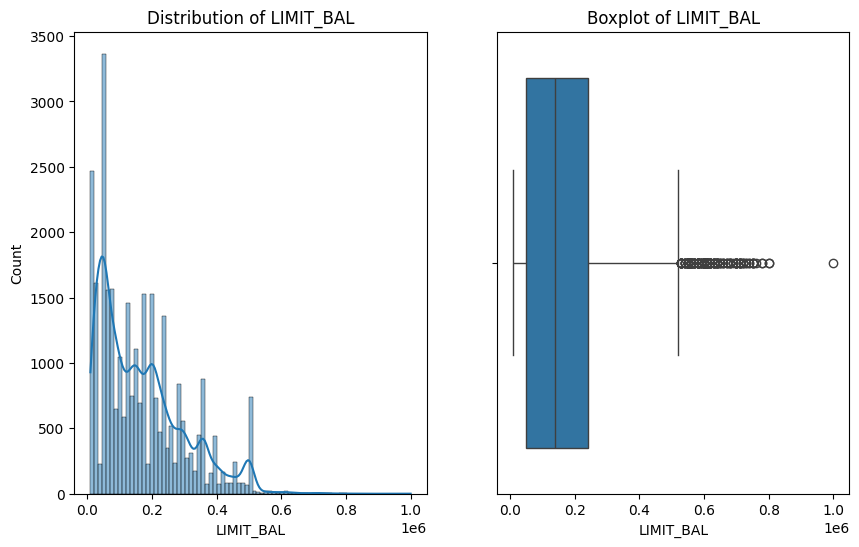

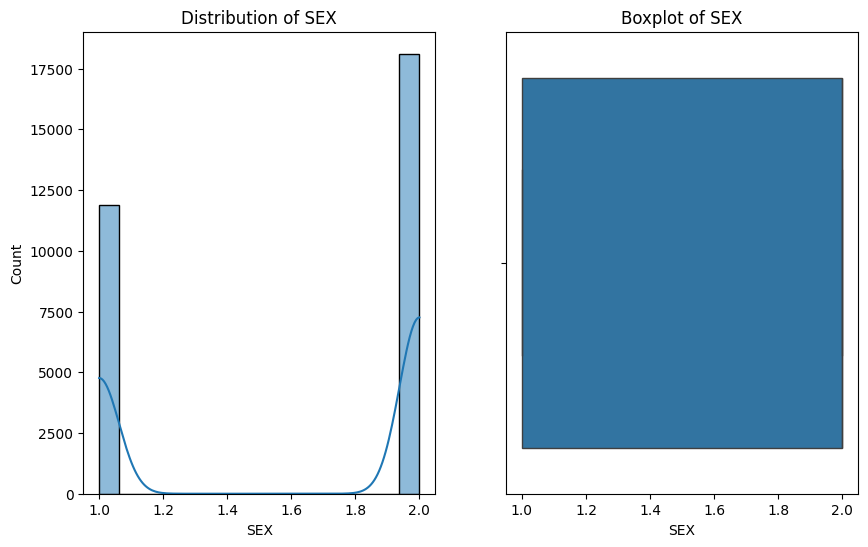

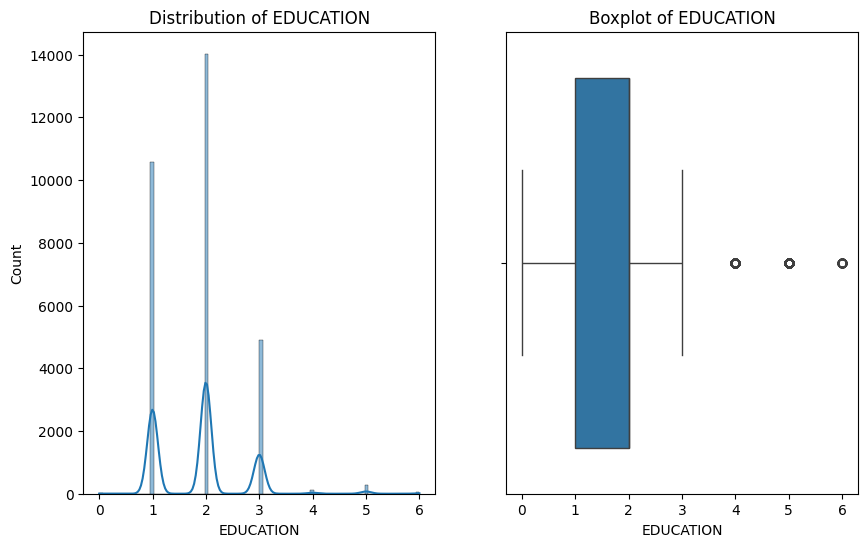

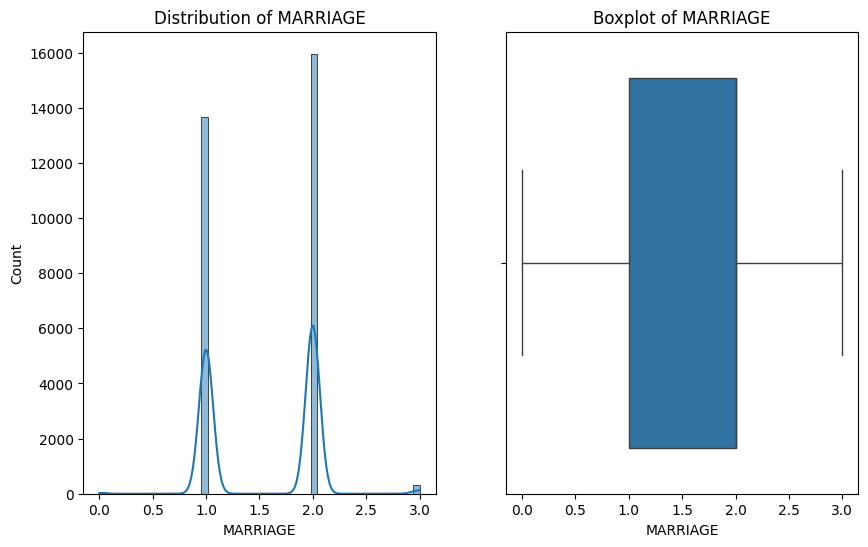

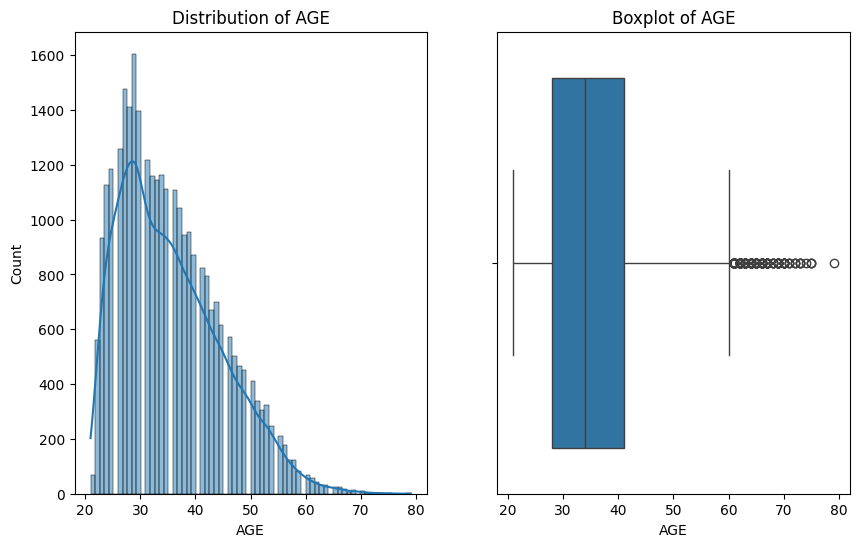

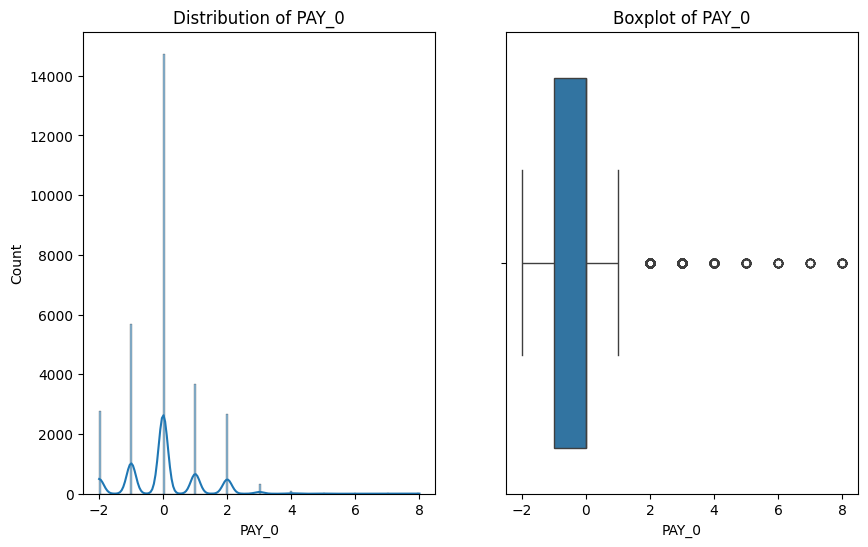

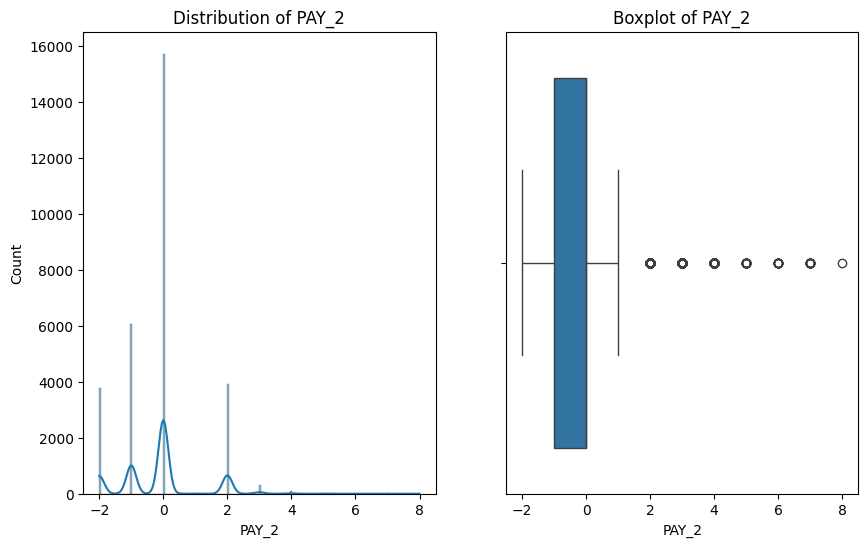

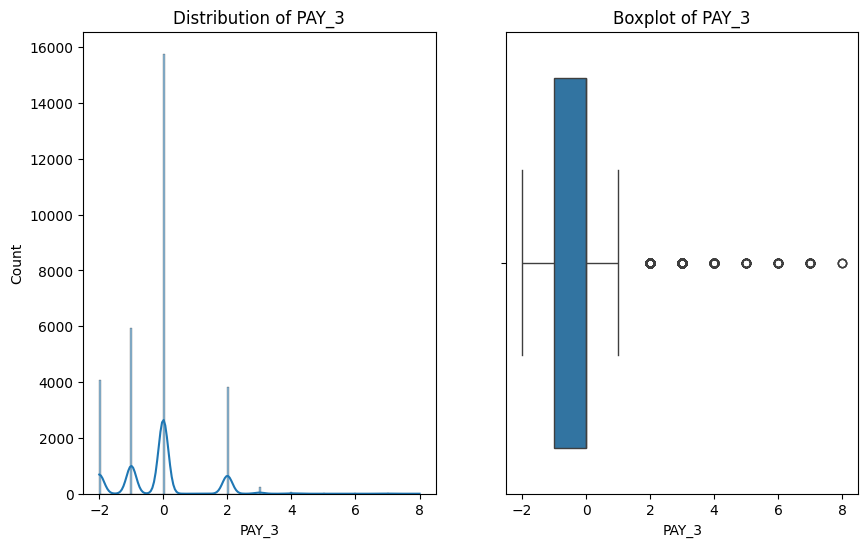

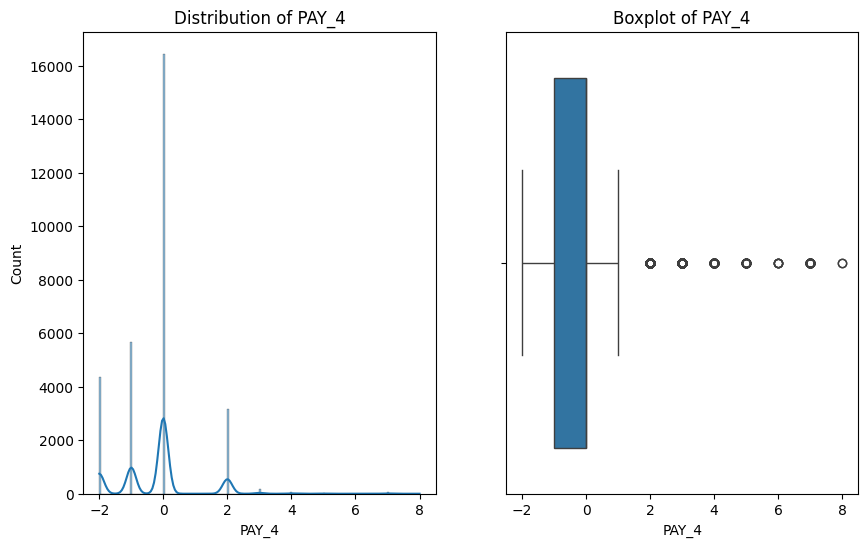

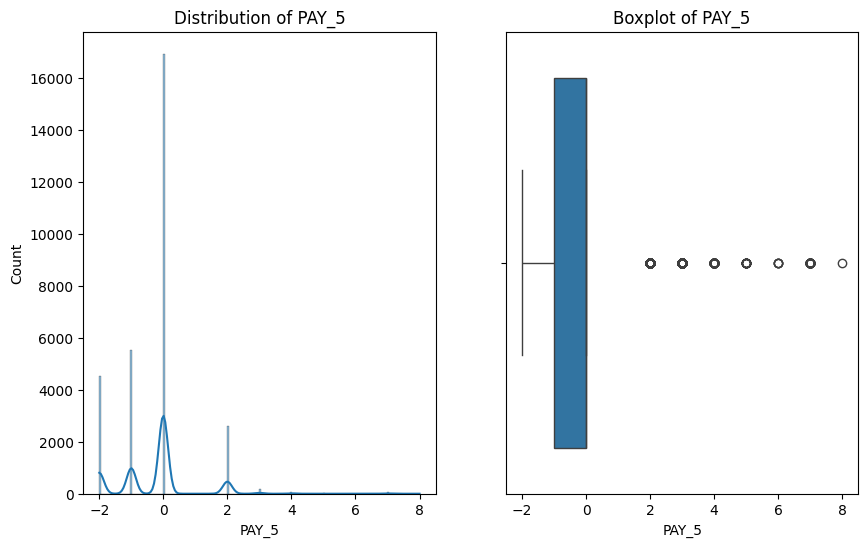

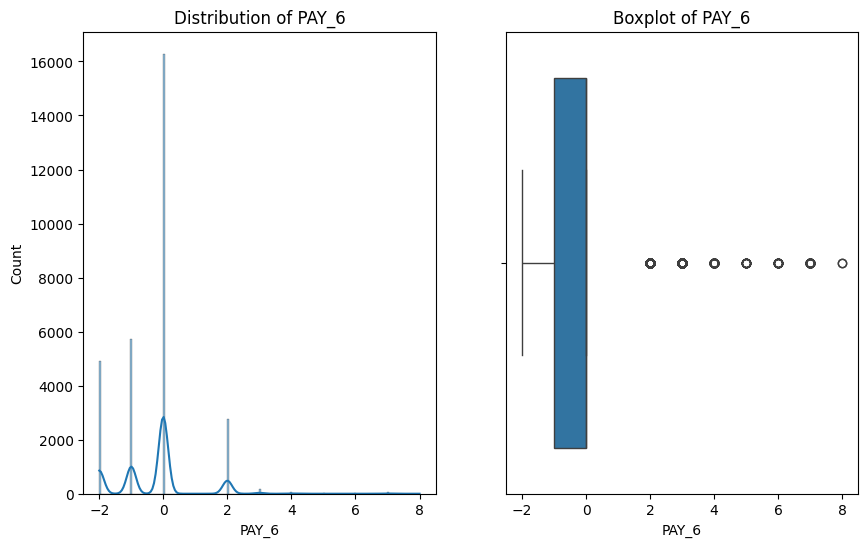

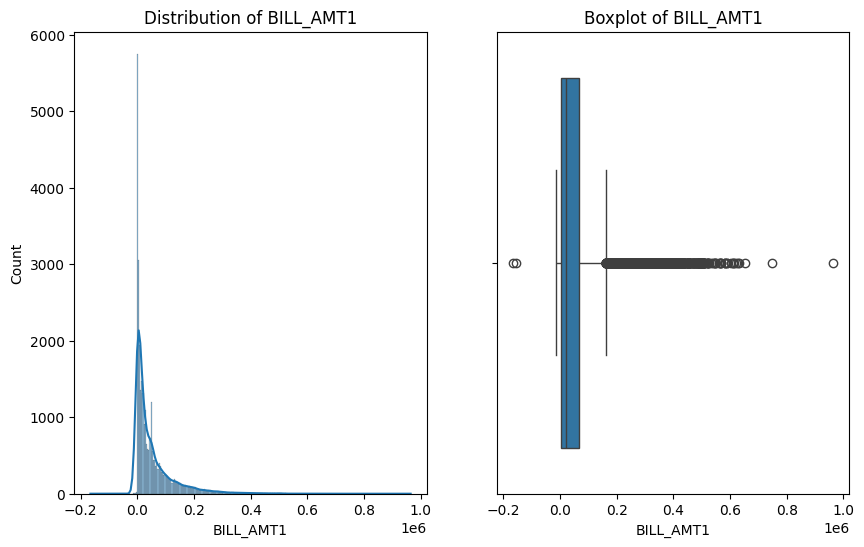

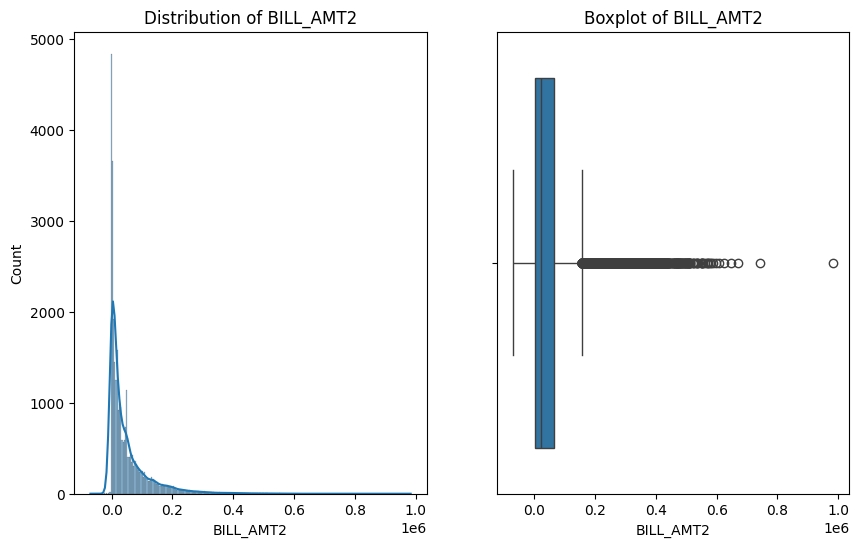

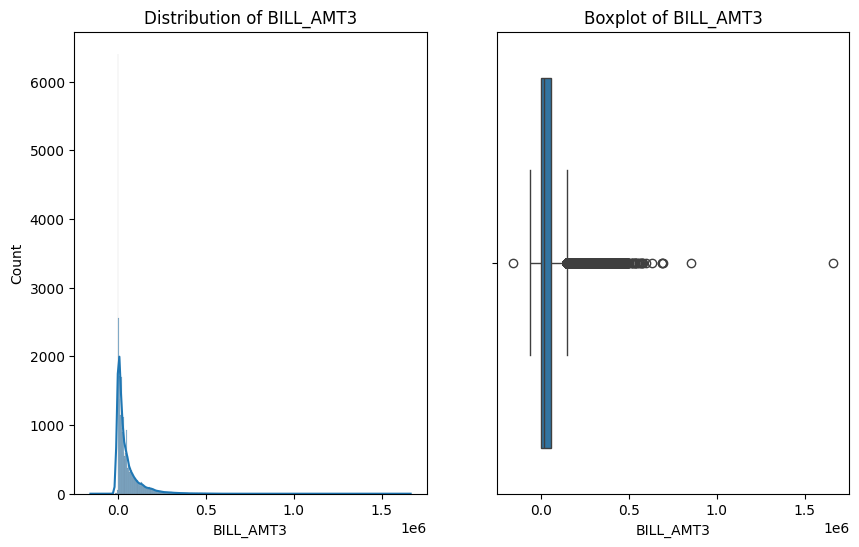

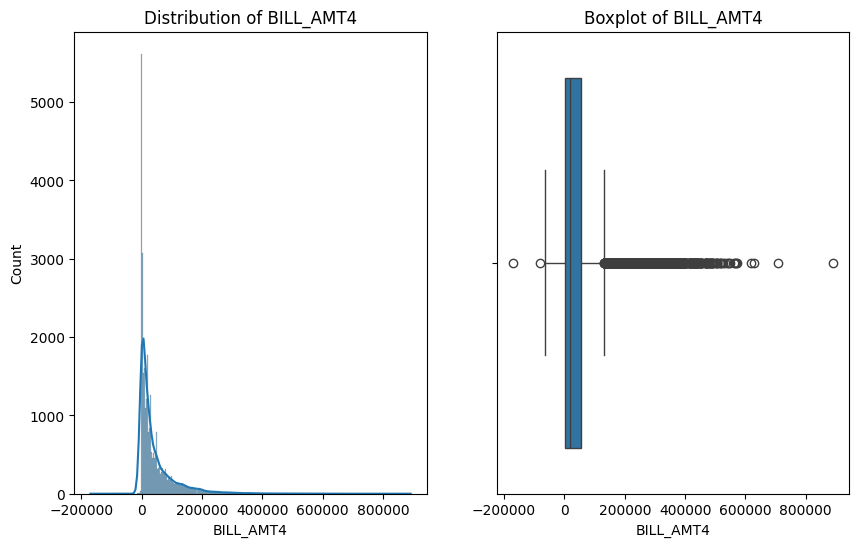

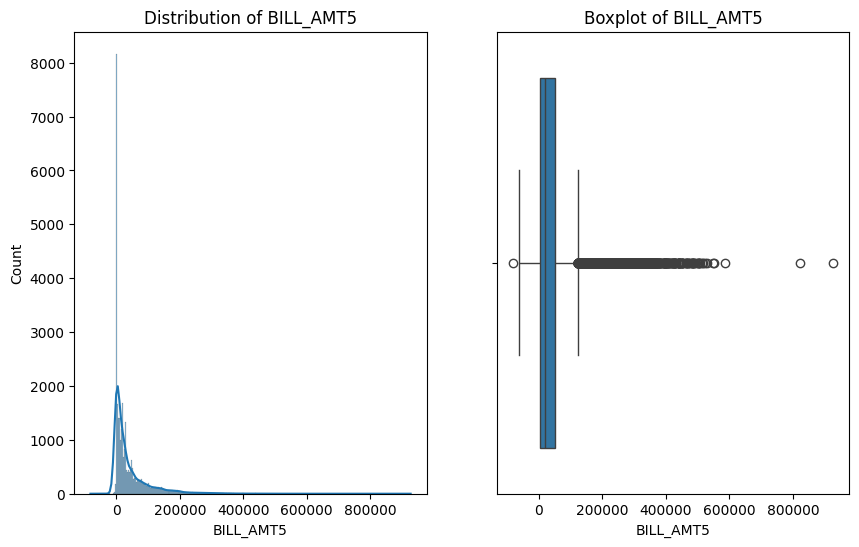

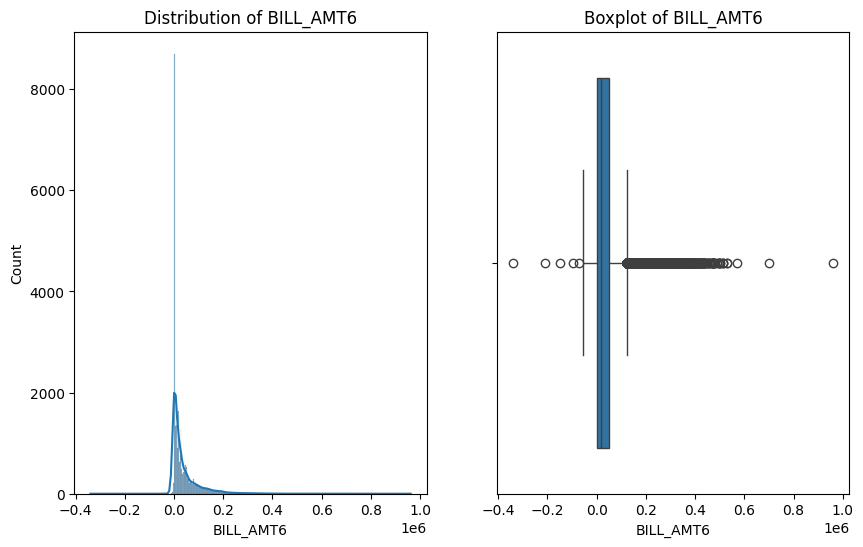

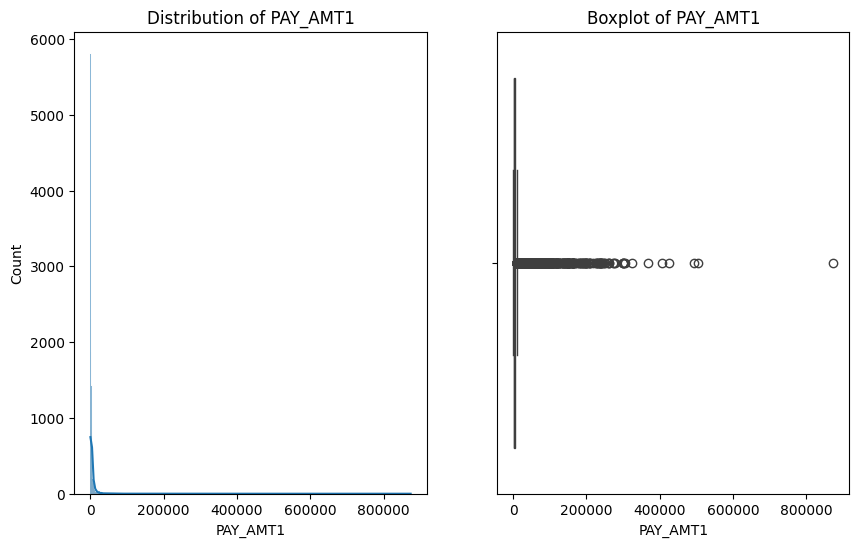

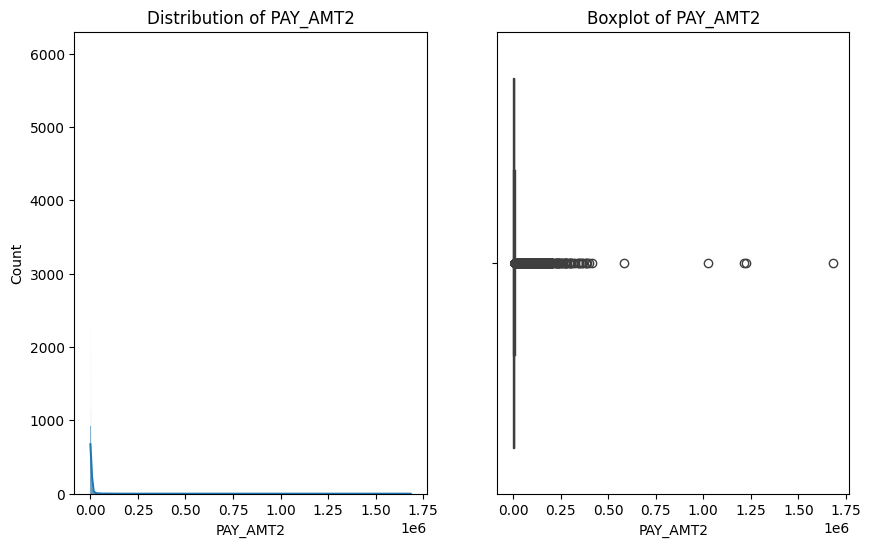

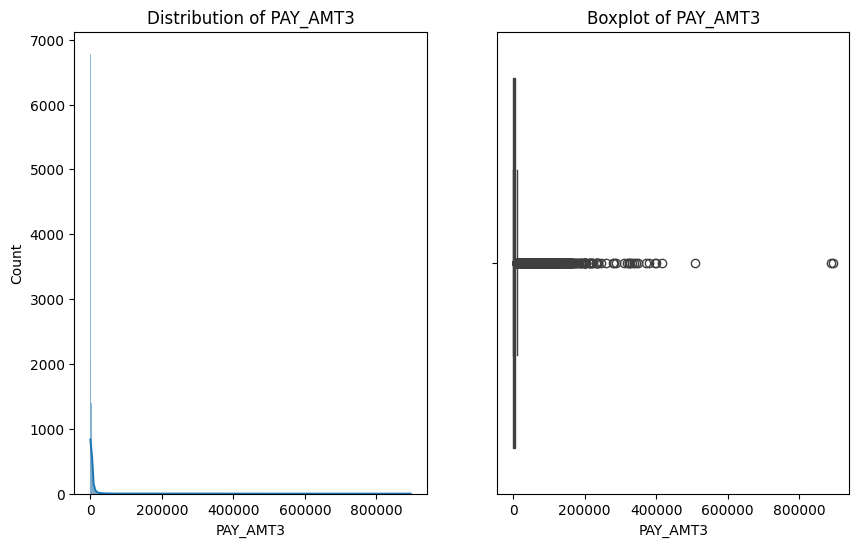

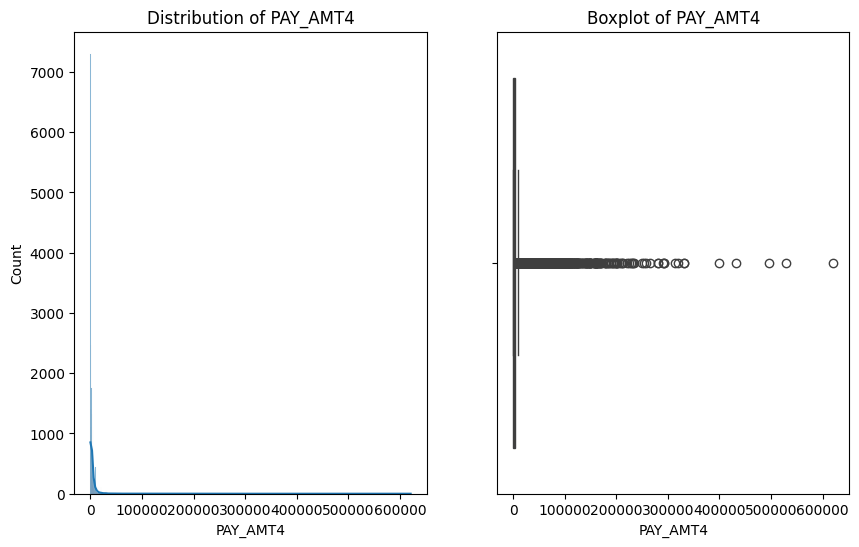

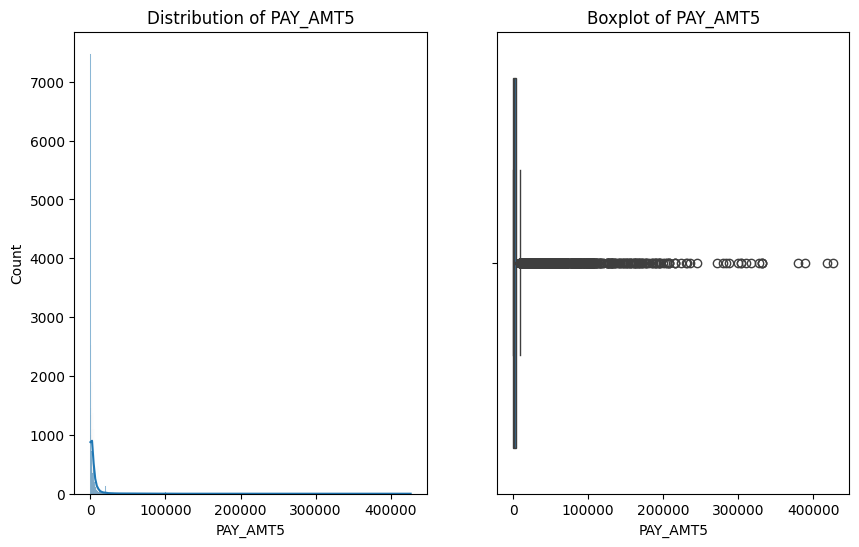

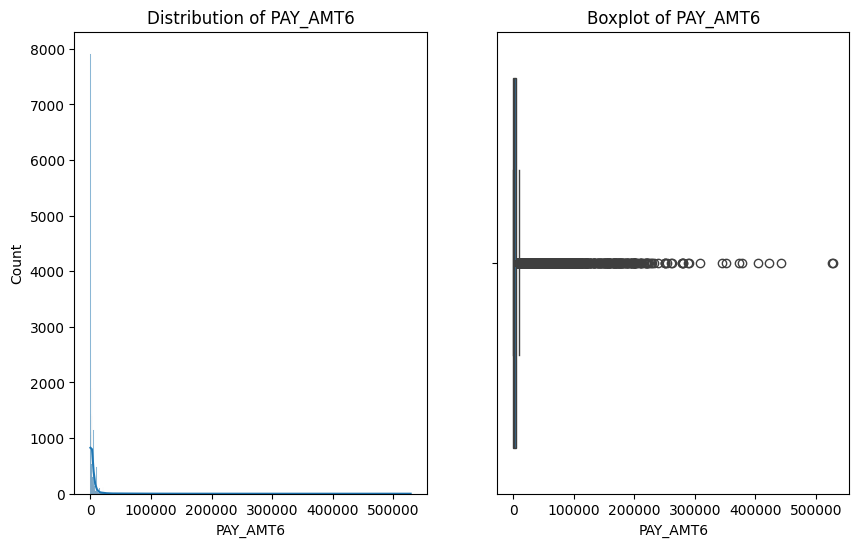

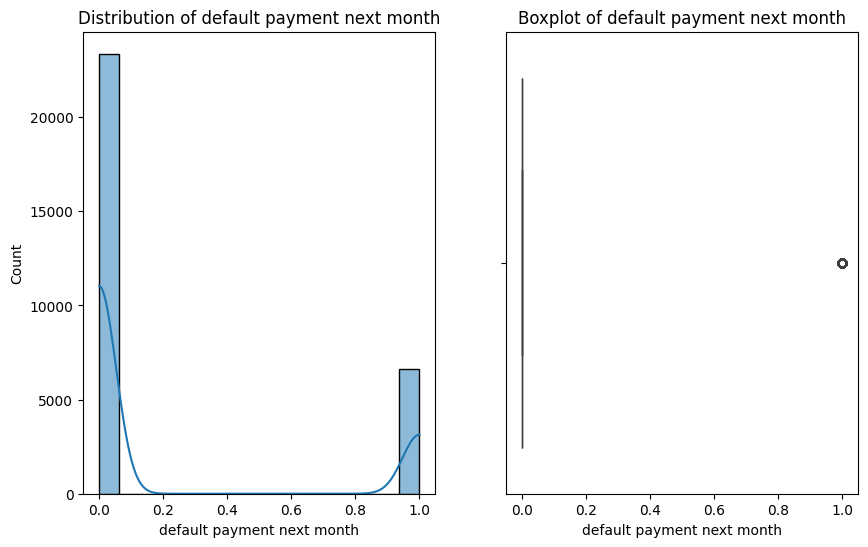

In [12]:
for column in numeric_columns:
  #Histplot
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.histplot(data[column],kde=True)
  plt.title(f"Distribution of {column}")
  #Boxplot
  plt.subplot(1,2,2)
  sns.boxplot(data[column],orient="h")
  plt.title(f"Boxplot of {column}")

In [13]:
numeric_columns_iqr = data.select_dtypes(include=[np.number]).columns
numeric_columns_iqr

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Using IQR method removing outlier

<ipython-input-14-d6b9e81972c7>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,5))


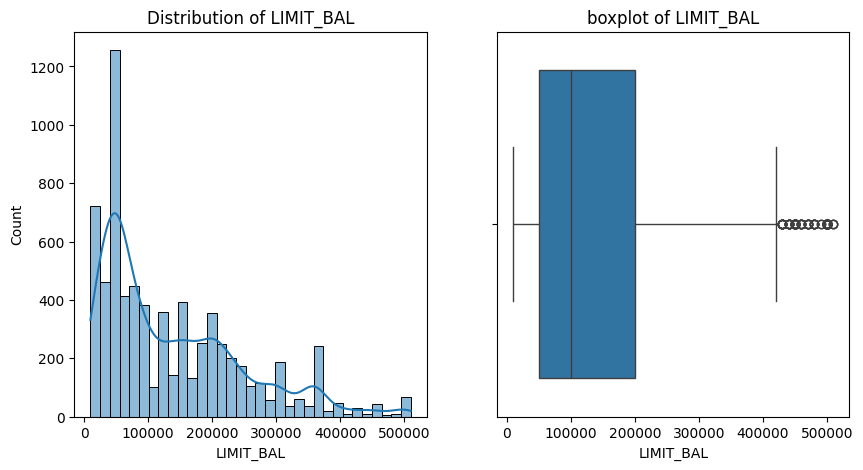

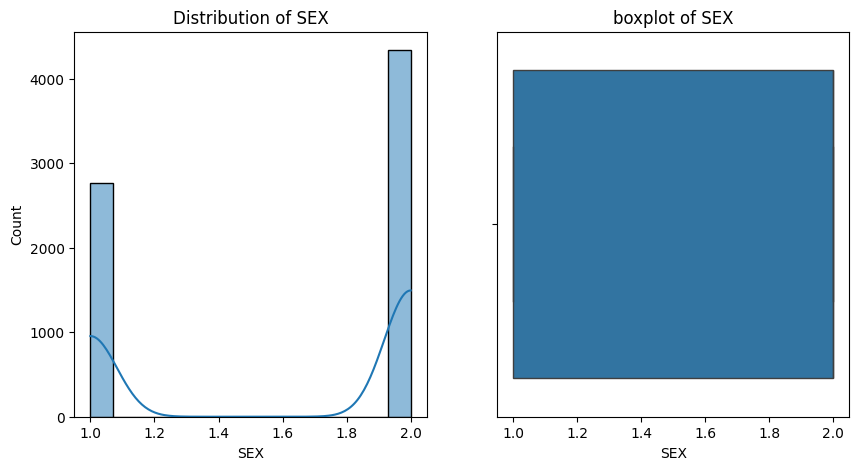

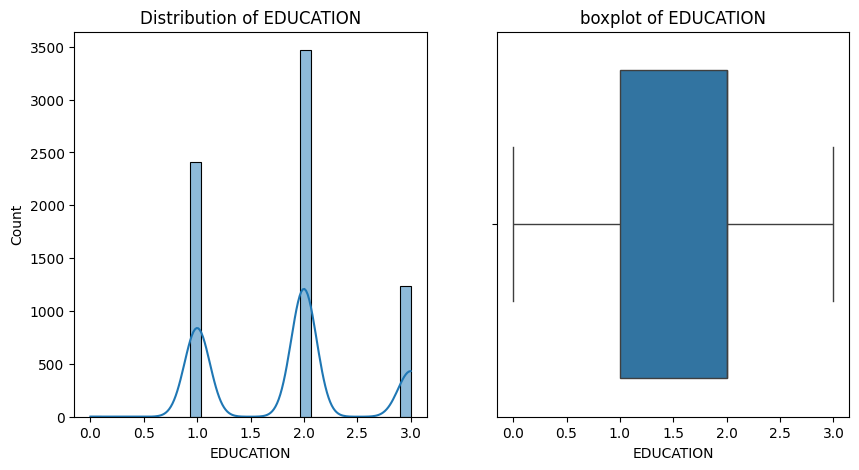

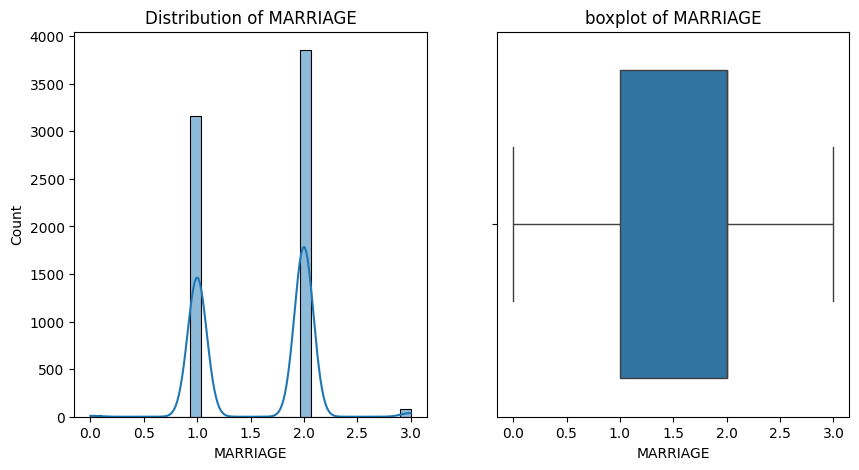

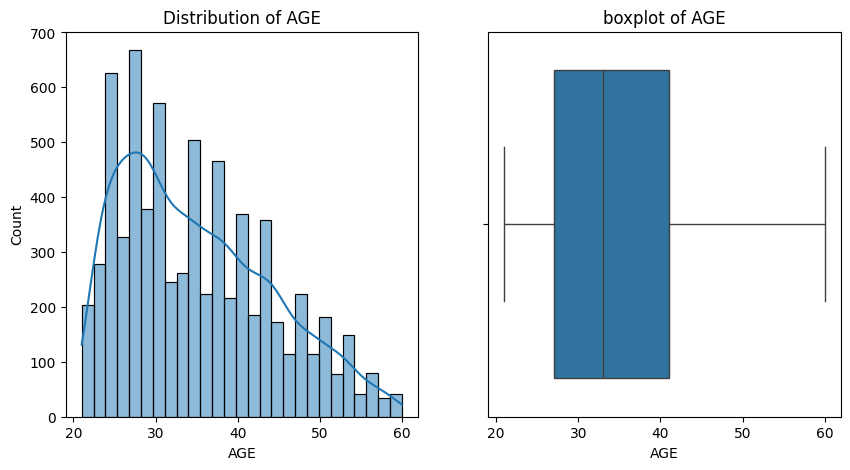

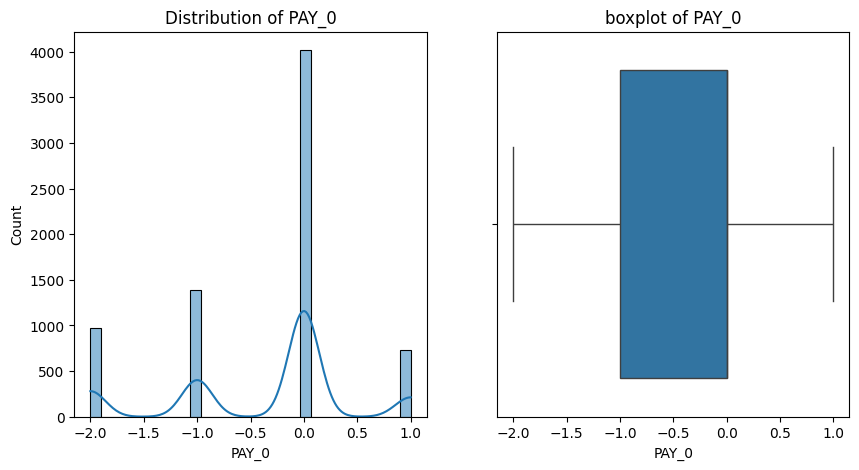

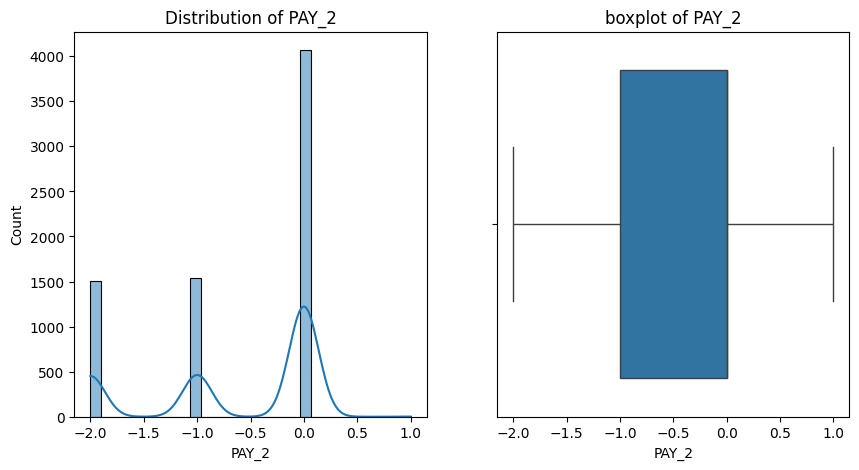

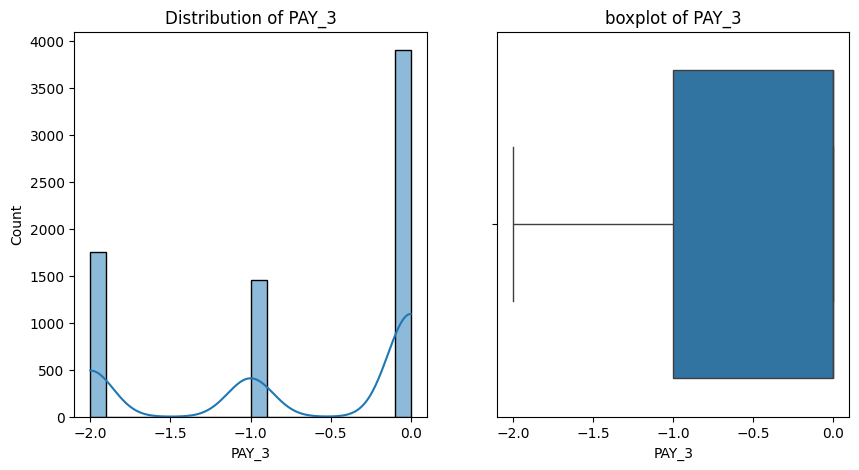

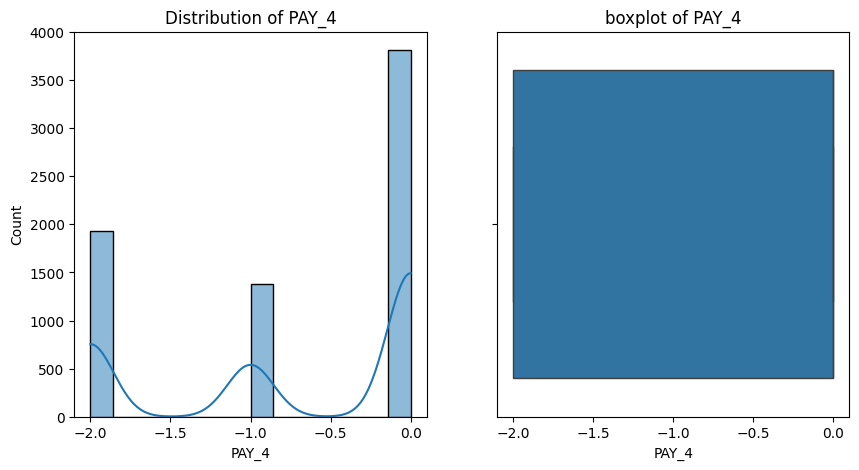

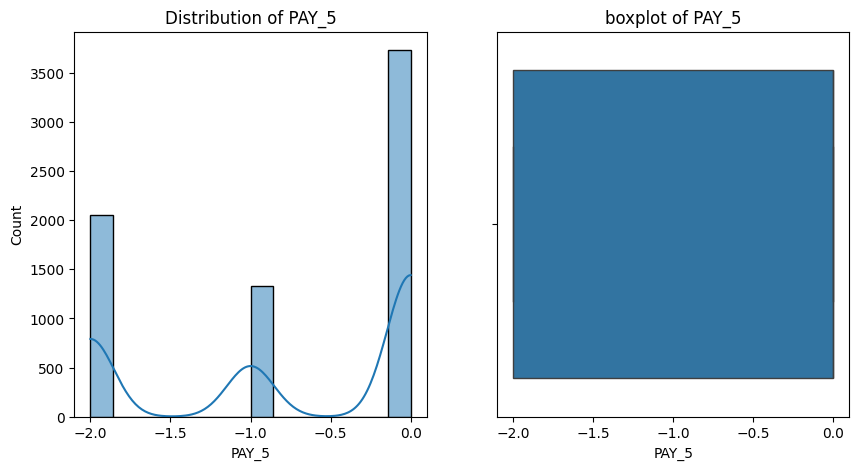

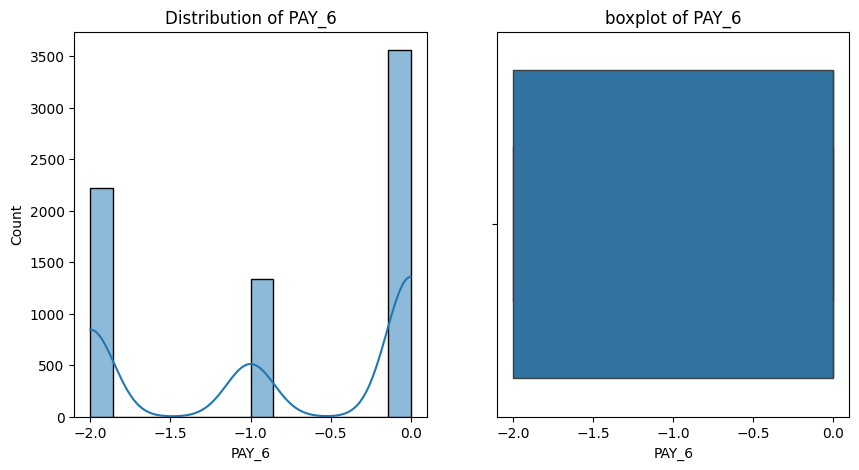

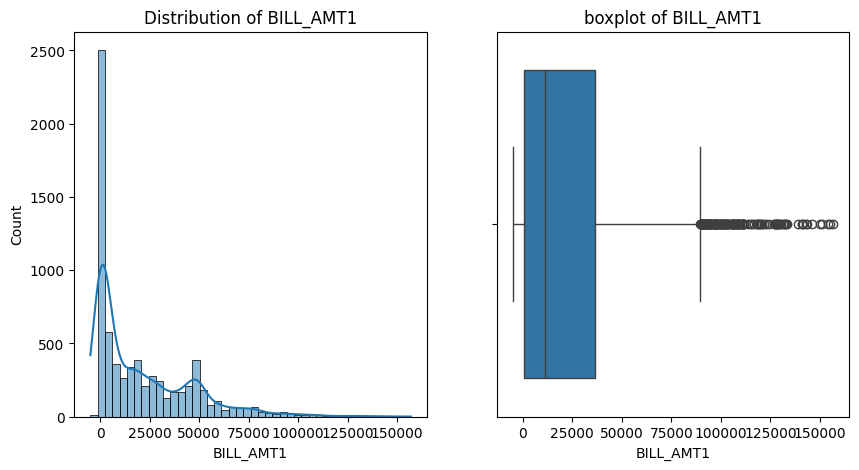

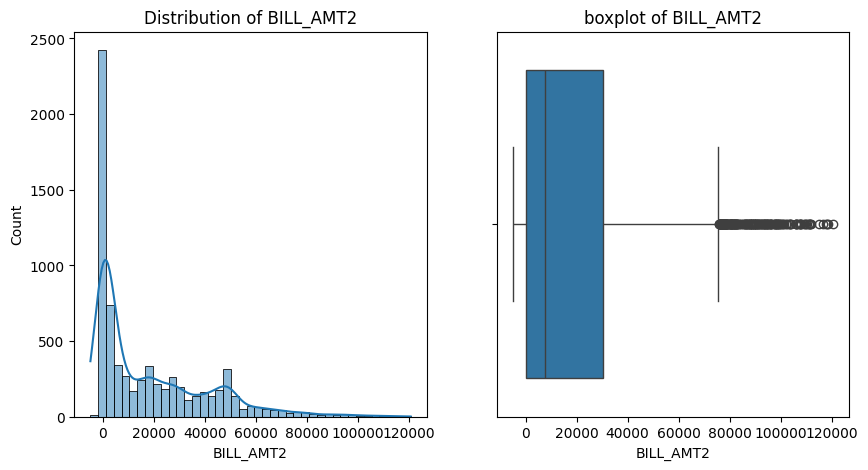

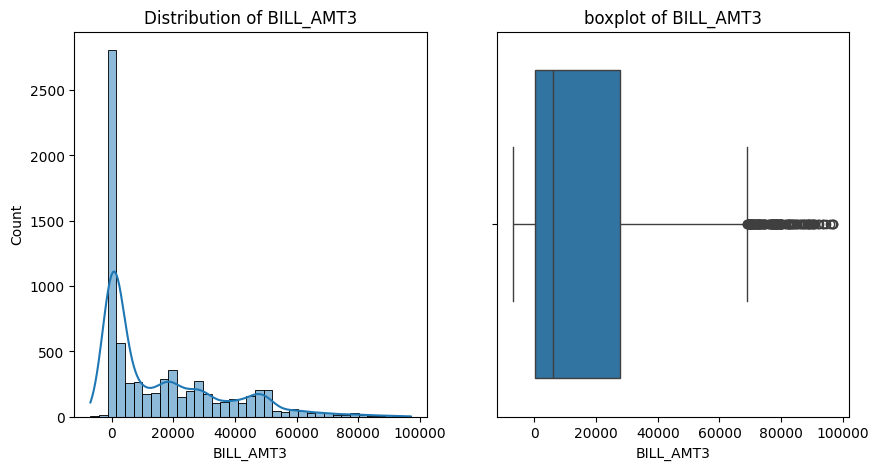

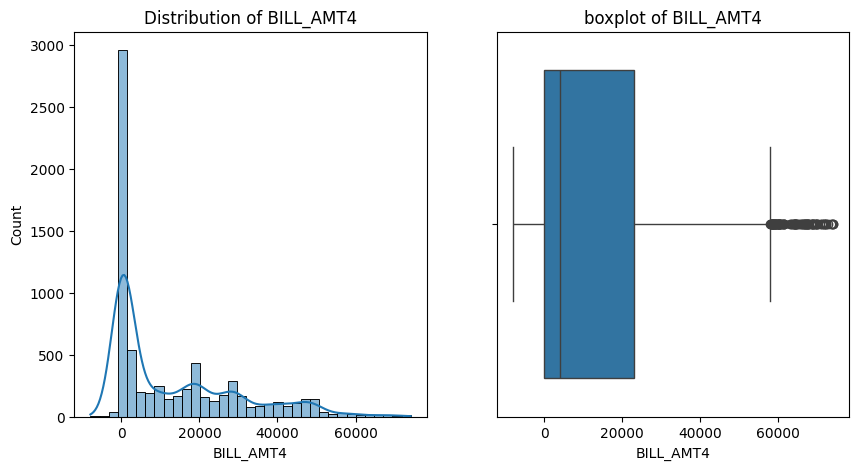

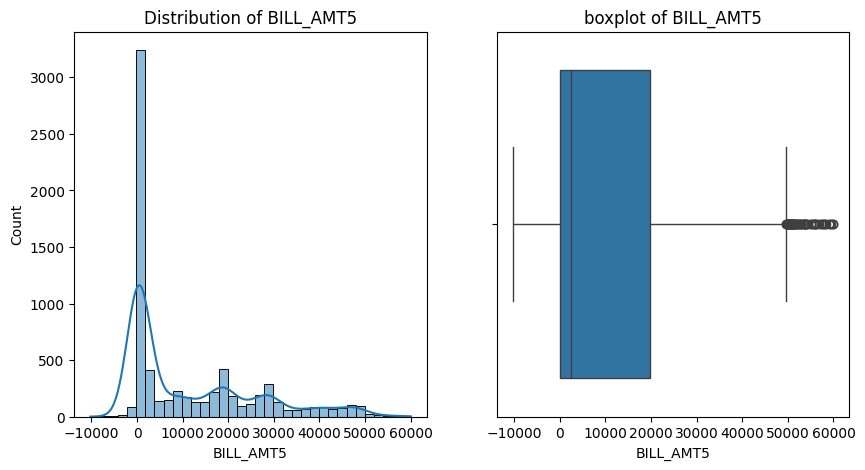

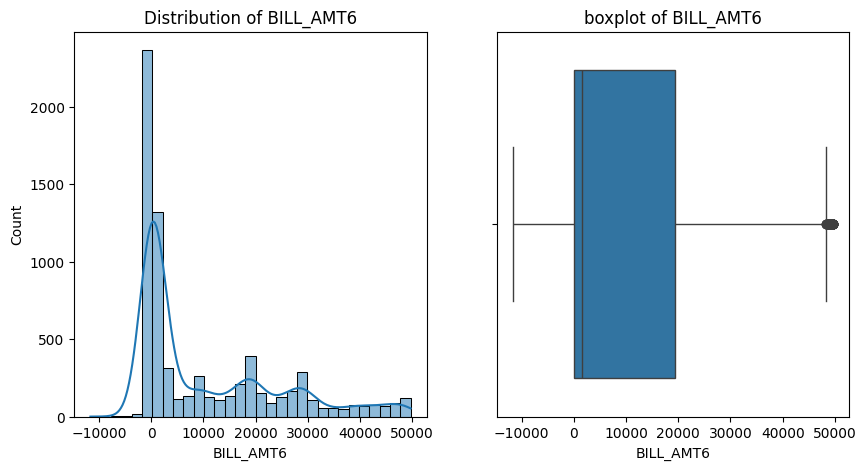

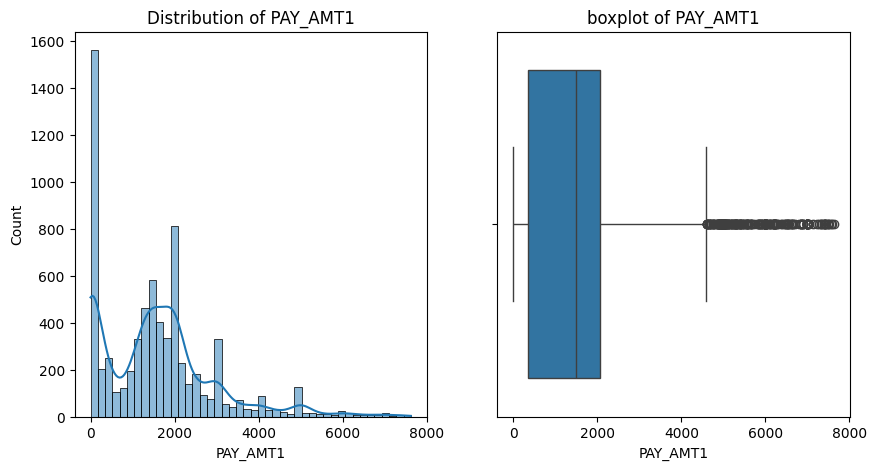

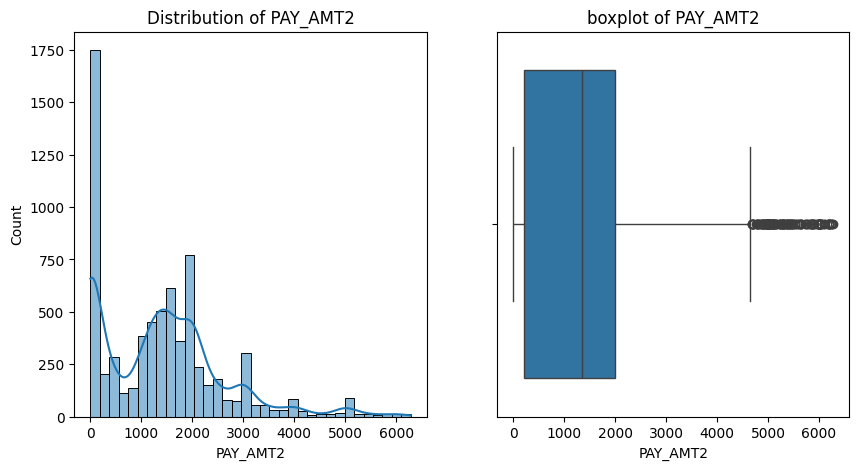

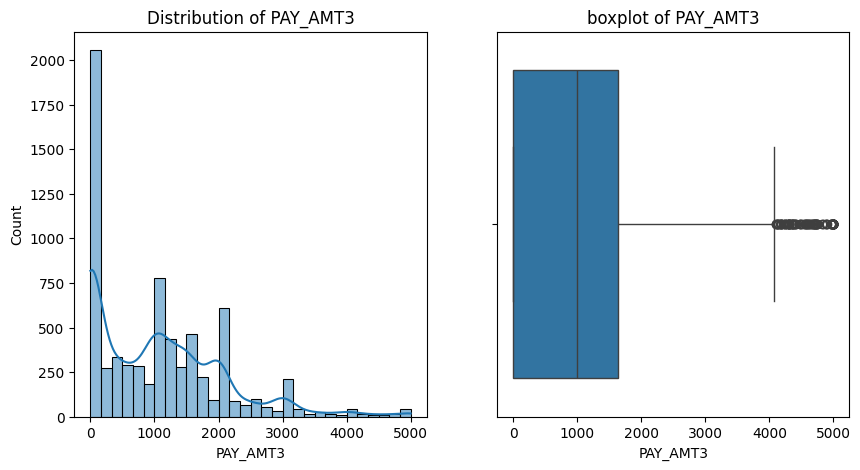

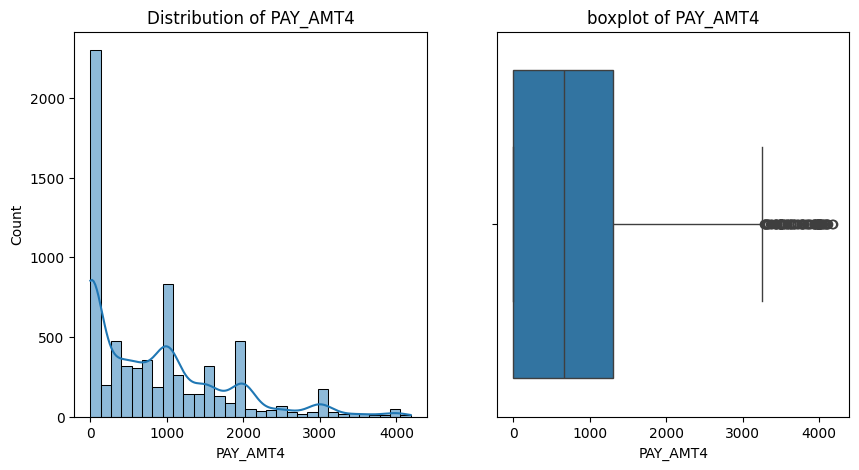

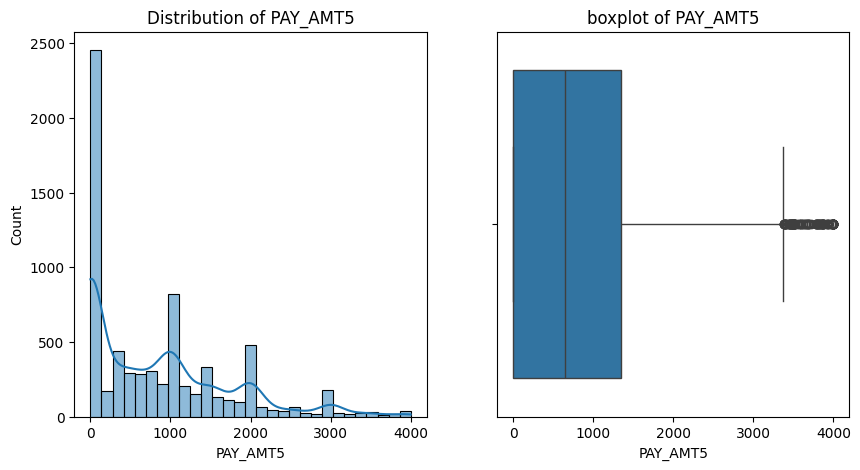

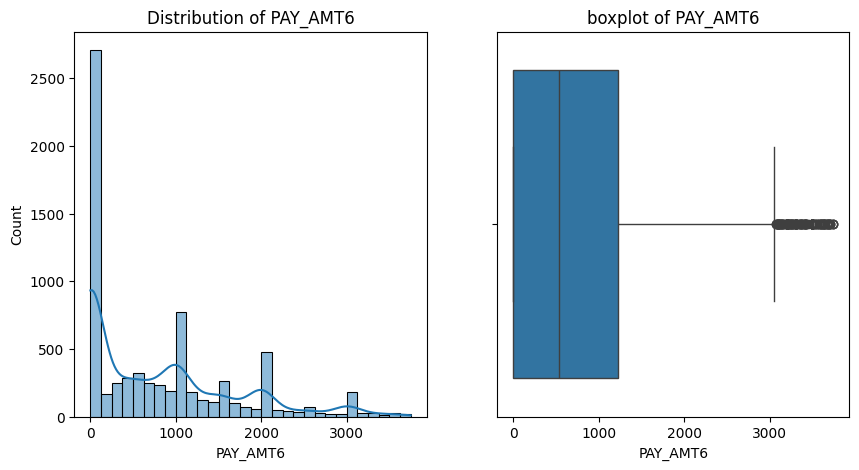

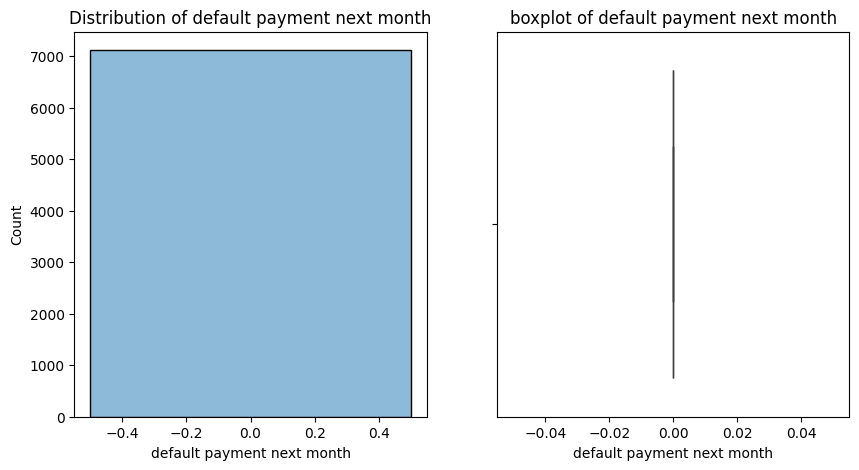

In [14]:
def remove_outliers(data,column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  return data[(data[column]>=lower_bound) & (data[column]<=upper_bound)]
cleaned_iqr_data=data.copy()
for column in numeric_columns_iqr :
  cleaned_iqr_data=remove_outliers(cleaned_iqr_data,column)
for column in numeric_columns_iqr :
  #histplot
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.histplot(cleaned_iqr_data[column],kde=True)
  plt.title(f"Distribution of {column}")

  #boxplot
  plt.subplot(1,2,2)
  sns.boxplot(cleaned_iqr_data[column],orient="h")
  plt.title(f"boxplot of {column}")



In [15]:
cleaned_iqr_data.select_dtypes(include=["number"]).skew()

LIMIT_BAL                     1.071991
SEX                          -0.452267
EDUCATION                     0.229736
MARRIAGE                     -0.060801
AGE                           0.585401
PAY_0                        -0.593157
PAY_2                        -0.742252
PAY_3                        -0.615624
PAY_4                        -0.536164
PAY_5                        -0.476288
PAY_6                        -0.376314
BILL_AMT1                     1.462896
BILL_AMT2                     1.327199
BILL_AMT3                     1.247149
BILL_AMT4                     1.159328
BILL_AMT5                     1.126315
BILL_AMT6                     1.187405
PAY_AMT1                      1.167665
PAY_AMT2                      0.989181
PAY_AMT3                      1.082095
PAY_AMT4                      1.164108
PAY_AMT5                      1.087198
PAY_AMT6                      1.079008
default payment next month    0.000000
dtype: float64

In [16]:
cleaned_iqr_data.shape

(7115, 24)

#using Z score method find outlier

In [17]:
from scipy.stats import zscore

# Create a copy of the original dataset
df_outlier =data.copy()

# Select numeric columns
numeric_columns_iqr = df_outlier.select_dtypes(include=[np.number]).columns.tolist()

# Calculate Z-scores for each numeric column
z_scores = np.abs(df_outlier[numeric_columns_iqr].apply(zscore))

# Define a threshold for Z-score (commonly 3)
z_threshold = 3

# Filter out rows where the Z-score is greater than the threshold (considered outliers)
df_cleaned = df_outlier[(z_scores < z_threshold).all(axis=1)]

# Check the shape before and after outlier removal
print(f"Shape before: {df_outlier.shape}")
print(f"Shape after outlier removal: {df_cleaned.shape}")

Shape before: (30000, 24)
Shape after outlier removal: (26429, 24)


#choosing z-score method

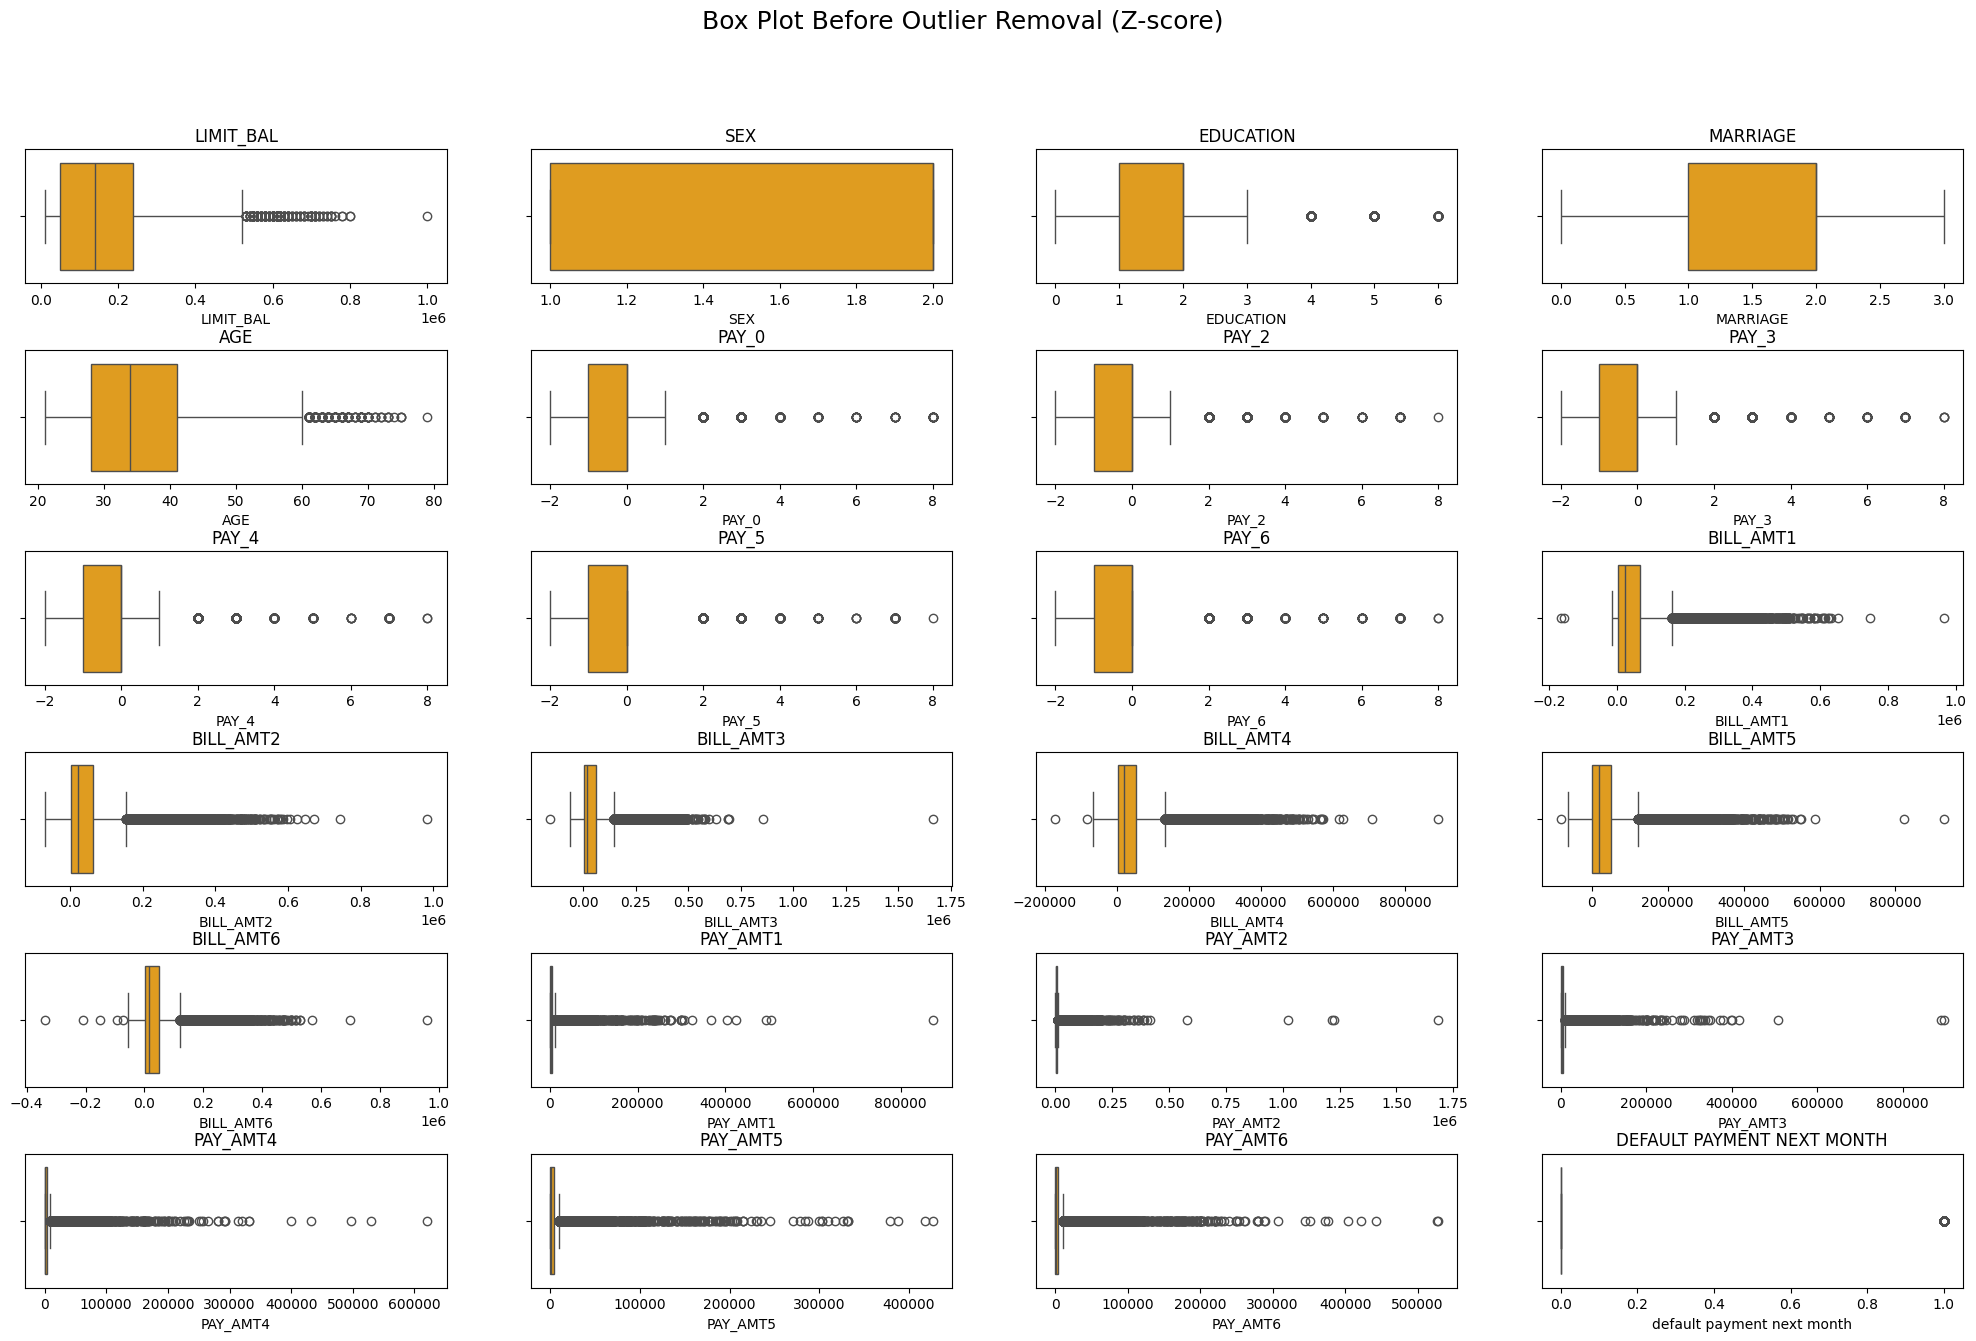

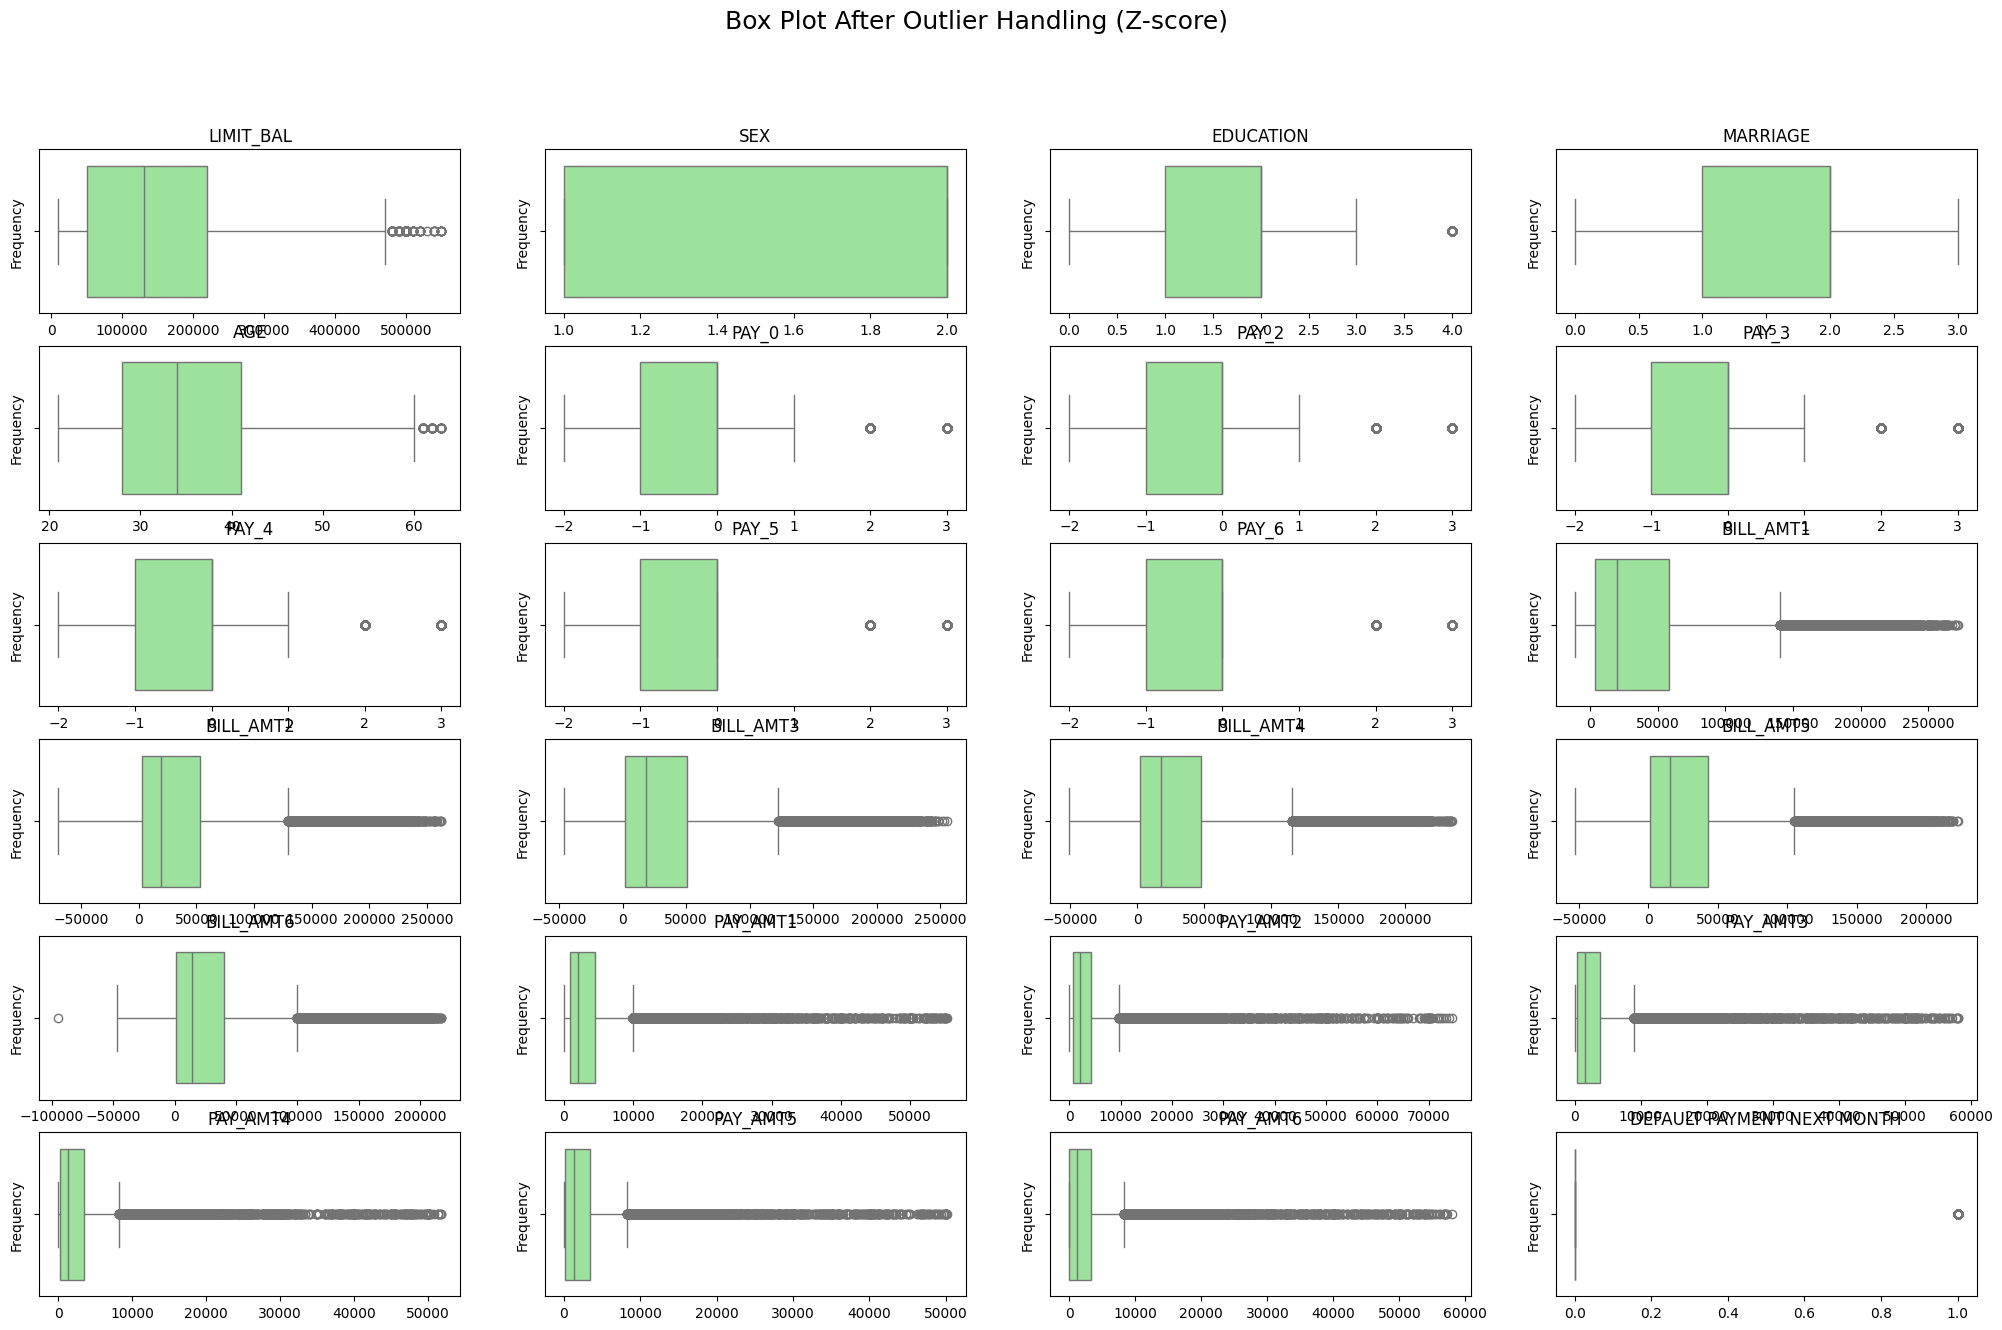

In [18]:
# Plot boxplots for the original (df_outlier) data
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot Before Outlier Removal (Z-score)", fontsize=18, y=0.95,)

for n, ticker in enumerate(numeric_columns_iqr):
    ax = plt.subplot(8, 4, n + 1)
    sns.boxplot(x=df_outlier[ticker], color='orange', ax=ax)
    ax.set_title(ticker.upper())

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

# Plot boxplots for the cleaned (df_cleaned) data
plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot After Outlier Handling (Z-score)", fontsize=18, y=0.95)

for n, ticker in enumerate(numeric_columns_iqr):
    ax = plt.subplot(8, 4, n + 1)
    sns.boxplot(x=df_cleaned[ticker], color='lightgreen', ax=ax)
    ax.set_title(ticker.upper())
    ax.set_xlabel("")  # Remove x-axis label
    ax.set_ylabel("Frequency")  # Add y-axis label
    ax.tick_params(axis='x', labelsize=10)  # Reduce x-axis label size
    ax.tick_params(axis='y', labelsize=10)  # Reduce y-axis label size

In [19]:
skewness_after_outliers=df_cleaned.skew()
skewness_after_outliers

LIMIT_BAL                     0.988084
SEX                          -0.452432
EDUCATION                     0.328625
MARRIAGE                     -0.033523
AGE                           0.647586
PAY_0                         0.260659
PAY_2                         0.487924
PAY_3                         0.448303
PAY_4                         0.420535
PAY_5                         0.390592
PAY_6                         0.415509
BILL_AMT1                     1.713624
BILL_AMT2                     1.737222
BILL_AMT3                     1.783340
BILL_AMT4                     1.851294
BILL_AMT5                     1.926436
BILL_AMT6                     1.967155
PAY_AMT1                      4.199515
PAY_AMT2                      4.942536
PAY_AMT3                      4.510846
PAY_AMT4                      4.514240
PAY_AMT5                      4.327931
PAY_AMT6                      4.727580
default payment next month    1.320178
dtype: float64

In [20]:
# Highlight the features with high skewness (greater than 0.5 or less than -0.5)
highly_skewed = skewness_after_outliers[(skewness_after_outliers > 0.5) | (skewness_after_outliers < -0.5)]
highly_skewed = highly_skewed.drop('default payment next month')

# Print the updated list of highly skewed features
print("\nHighly skewed features (without target column):")
print(highly_skewed)
print(len(highly_skewed))


Highly skewed features (without target column):
LIMIT_BAL    0.988084
AGE          0.647586
BILL_AMT1    1.713624
BILL_AMT2    1.737222
BILL_AMT3    1.783340
BILL_AMT4    1.851294
BILL_AMT5    1.926436
BILL_AMT6    1.967155
PAY_AMT1     4.199515
PAY_AMT2     4.942536
PAY_AMT3     4.510846
PAY_AMT4     4.514240
PAY_AMT5     4.327931
PAY_AMT6     4.727580
dtype: float64
14


In [21]:
from scipy.stats import boxcox
from scipy import stats
# Create a copy of the cleaned data
df_transformed = df_cleaned.copy()

# Columns to transform
cols_to_transform = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
                     'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                     'PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']


# Apply Box-Cox transformation to highly skewed features
for column in highly_skewed.index:
    # Ensure the data is positive (Box-Cox requires positive values)
    df_transformed[column] = df_transformed[column] + 1 - df_transformed[column].min()

    # Apply Box-Cox transformation
    df_transformed[column], _ = stats.boxcox(df_transformed[column])


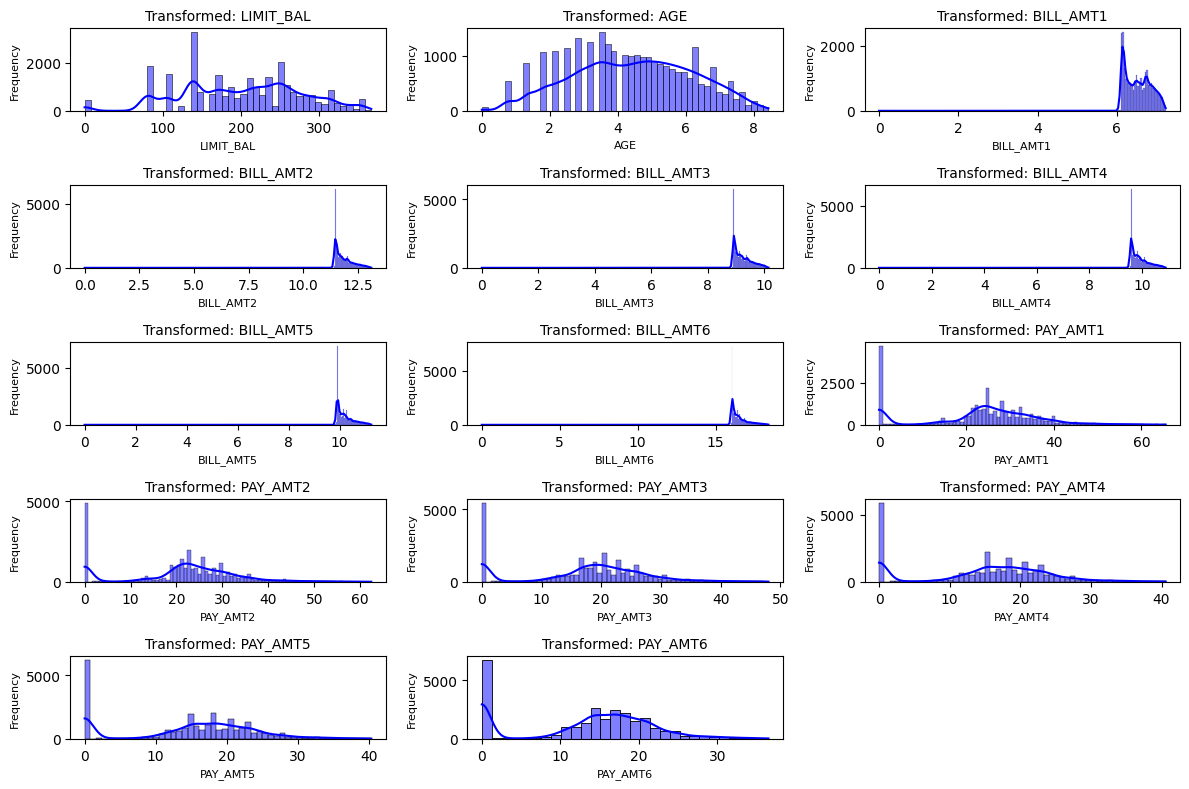

In [22]:
# Plot histograms for the transformed highly skewed features
plt.figure(figsize=(12, 8))  # Smaller figure size

# Adjust the grid size for subplots, with 3 columns per row
for n, column in enumerate(highly_skewed.index):
    plt.subplot(len(highly_skewed) // 3 + 1, 3, n + 1)
    sns.histplot(df_transformed[column], kde=True, color='blue')
    plt.title(f'Transformed: {column}', fontsize=10)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [23]:
from scipy.stats import skew

# DataFrame to store skewness values
skewness_results = []

# Calculate skewness for each transformed column
skewness_results = []
for col in cols_to_transform:
    skewness = stats.skew(df_transformed[col], nan_policy='omit')
    skewness_results.append((col, skewness))

# Print the skewness after transformation
print("Skewness After Transformation:")
for col, skew_value in skewness_results:
    print(f"{col}: {skew_value:.4f}")

Skewness After Transformation:
LIMIT_BAL: -0.1632
AGE: -0.0665
BILL_AMT1: -0.0731
BILL_AMT2: 0.0175
BILL_AMT3: -0.1279
BILL_AMT4: -0.0896
BILL_AMT5: -0.0739
BILL_AMT6: 0.2372
PAY_AMT1: -0.2892
PAY_AMT2: -0.2612
PAY_AMT3: -0.2707
PAY_AMT4: -0.2697
PAY_AMT5: -0.2900
PAY_AMT6: -0.2808


* Most highly skewed features were successfully made less skewed by the boxcox transformation, especially variables like BILL_AMT1-BILL_AMT6,and PAY_AMT1-PAY_AMT6 which improved model stability and brought them closer to a normal distribution.

#Exploratory Data Analysis (EDA)

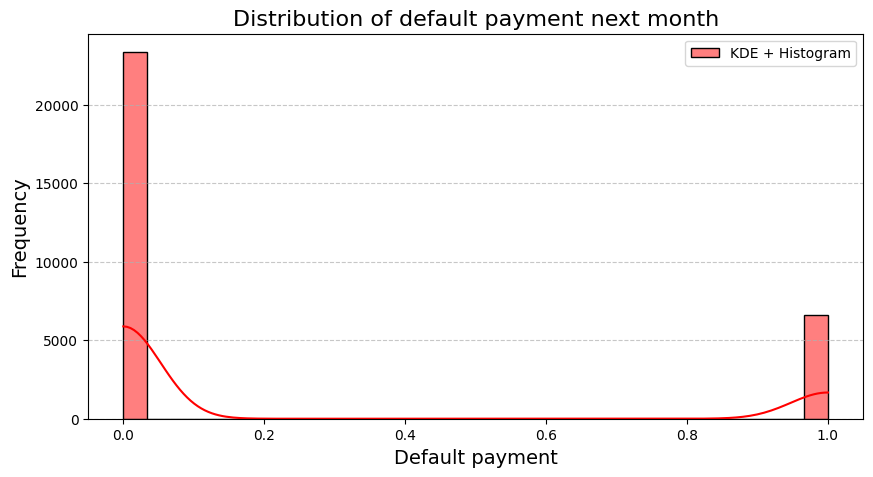

In [24]:
# Combined visualization for the 'Appliances' column
plt.figure(figsize=(10, 5))

# Distplot with KDE
sns.histplot(data['default payment next month'], kde=True, color='red', bins=30, label='KDE + Histogram')
plt.title('Distribution of default payment next month', fontsize=16)
plt.xlabel('Default payment', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The given skewness of 1.3201 for the variable default payment next month suggests that the distribution is moderately positively skewed. A positive skew indicates that the right tail of the distribution (higher values) is longer than the left tail (lower values). This could mean that most individuals have lower default probabilities, with fewer individuals having higher probabilities.

In [25]:
# Correlation Heatmap visualization code

correlation = data.corr()
print(correlation)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

# Heatmap

Text(0.5, 1.0, 'Correlation Heatmap of Features')

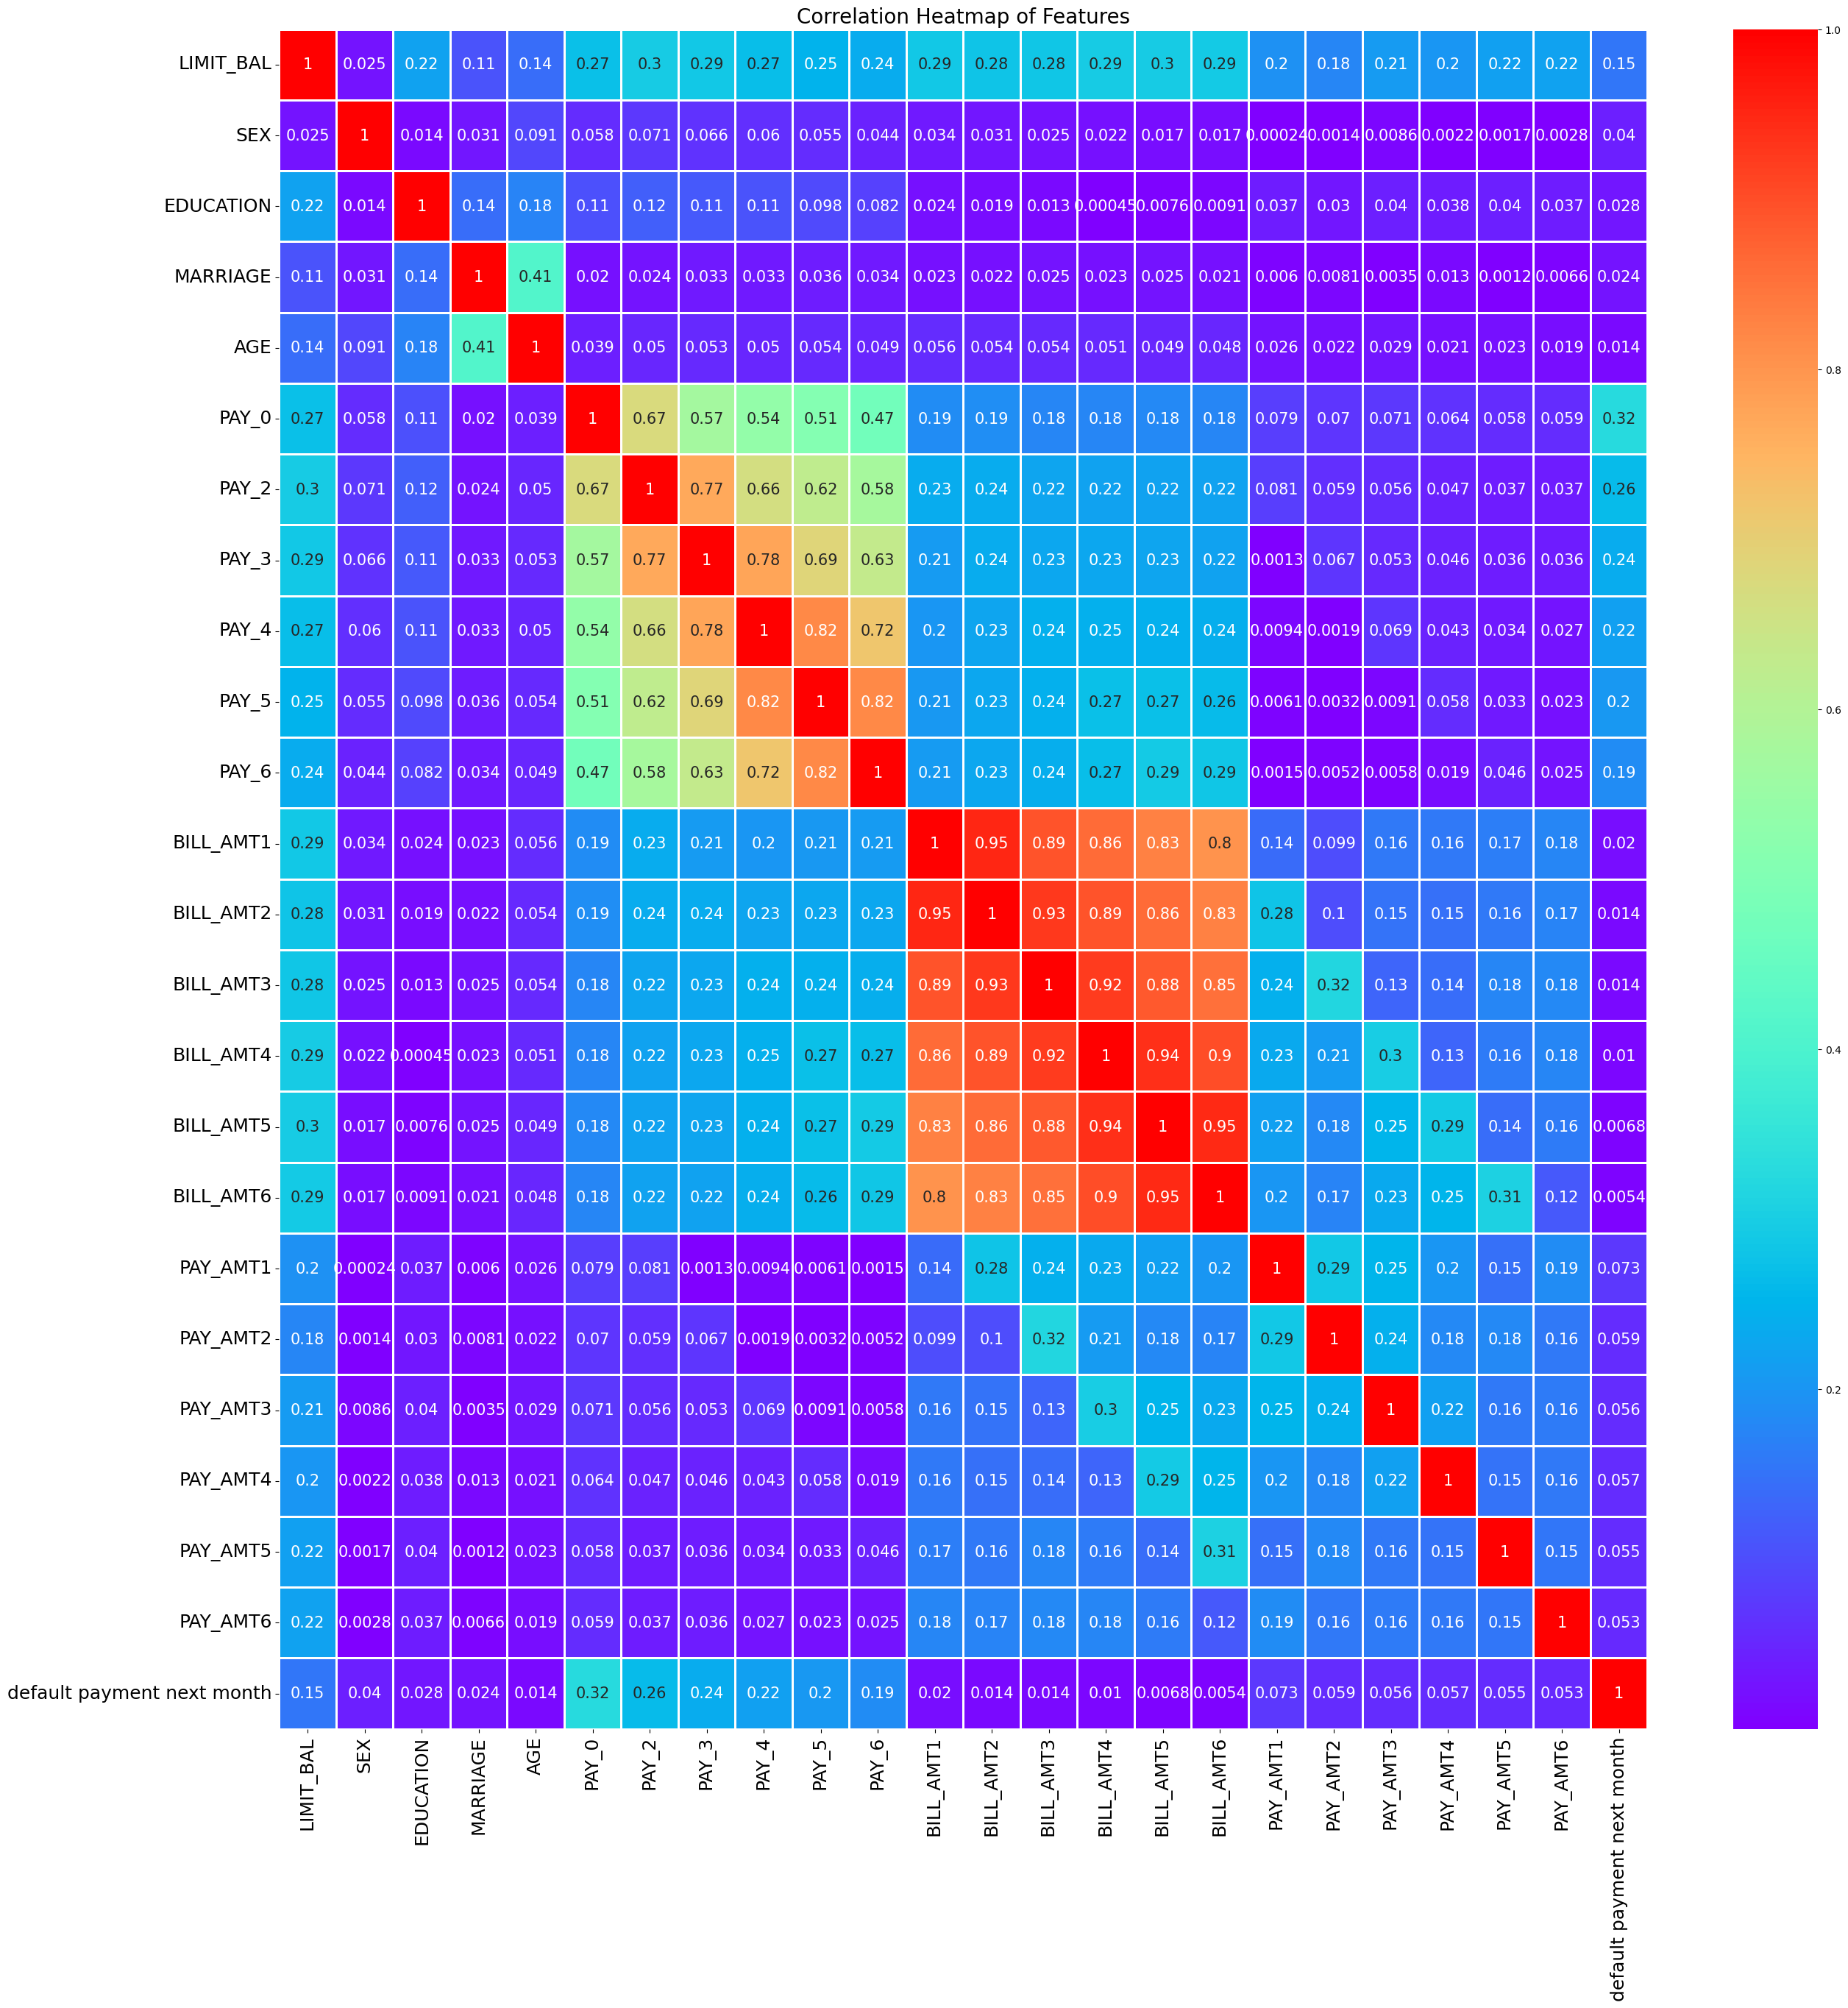

In [26]:
plt.figure(figsize=(30, 30))
sns.heatmap(abs(correlation), annot=True, cmap='rainbow', linewidth=1, annot_kws={'size': 15})
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Correlation Heatmap of Features', fontsize=20)

### Insights:
The heatmap helps us figure out which features are important to keep and which ones we can remove or combine.

* **PAY_0 - PAY_6: History of past payment:**
From the heatmap, we can see that past payment columns—**PAY_0 - PAY_6 are highly correlated and moderate correlated**.
* **BILL_AMT1-BILL_AMT6:Amount of bill statement**, we notice that Amount bill statement **strongly corrected** each other.
* **PAY_AMT1-PAY_AMT6:**
The features like **PAY_AMT1-PAY_AMT6** have **low correlation** with default payment next month,but it's need to train the date.
* **Random Variables:**
 The random variables like **SEX,EDUCATION,MARRIAGE,AGE** show little to no correlation with the target variable, suggesting they aren’t very helpful for predicting default payment next month . These could be excluded.


## Exploring Factors Influencing Default payment next month

In [27]:
# Calculate the correlation matrix
corr_matrix = data.corr()
appliances_corr = corr_matrix["default payment next month"].sort_values(ascending=False)

# Display correlations with 'Appliances'
print("Correlation with default payment next month:\n")
print(appliances_corr)

Correlation with default payment next month:

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default paym

## The relationship between History of past payment and default payment next month.

In [28]:
History_of_past_payment=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [29]:
# Correlation of past payment features with Appliances
past_payment_corr = data[History_of_past_payment + ['default payment next month']].corr()['default payment next month'].sort_values(ascending=False)
print("Correlation of past payment Features default payment next month:\n")
print(past_payment_corr)

Correlation of past payment Features default payment next month:

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
Name: default payment next month, dtype: float64


The correlation coefficients between "default payment next month" and various past history payment-related features are generally weak, with most values being close to zero. indicating that history of past payment have weak effect on default payment next month (Target column).All the correlation being weak positive correlation coefficients.

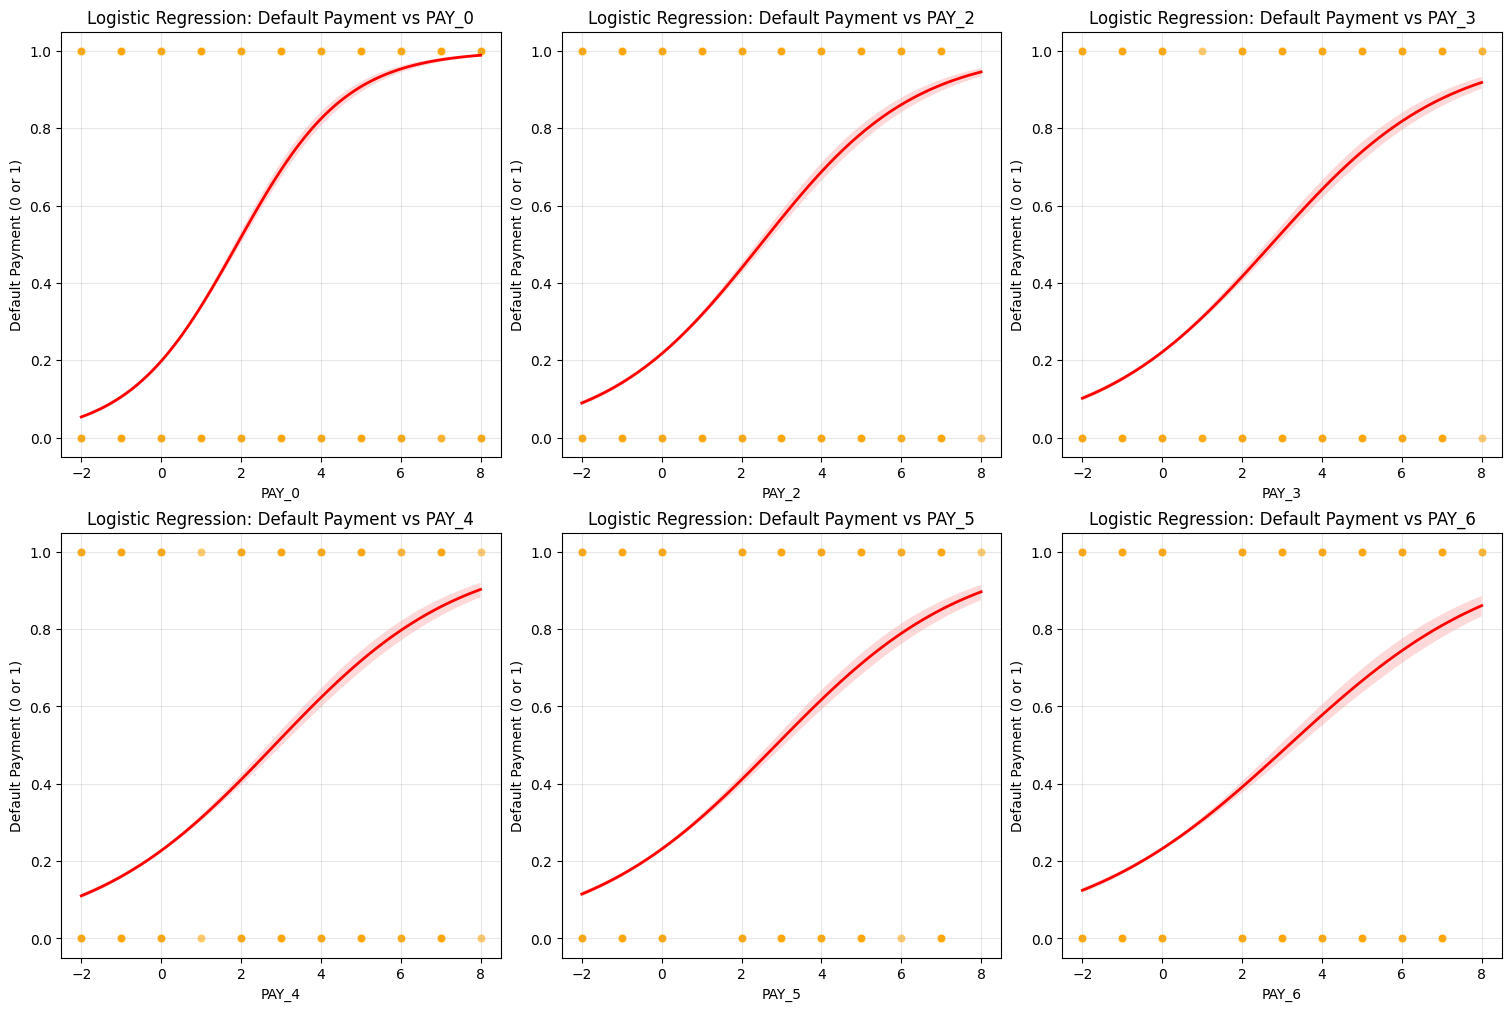

In [30]:
# Define grid dimensions
num_cols = 3  # Number of columns
num_features = len(History_of_past_payment)
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), constrained_layout=True)
axes = axes.flatten()  # Flatten for easy indexing

# Plot scatter plots with logistic regression lines
for i, feature in enumerate(History_of_past_payment):
    sns.scatterplot(
        data=data, x=feature, y="default payment next month",
        color='orange', alpha=0.6, ax=axes[i]
    )
    sns.regplot(
        data=data, x=feature, y="default payment next month",
        logistic=True, scatter=False, color='red', line_kws={"linewidth": 2}, ax=axes[i]
    )
    axes[i].set_title(f"Logistic Regression: Default Payment vs {feature}", fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Default Payment (0 or 1)", fontsize=10)
    axes[i].grid(alpha=0.3)

# Remove any empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.show()


## Correlation Overview:
**1.Correlation Coefficients:**

  * Correlation values indicate the strength of the linear relationship between features and default payment next month.
  * Higher correlation values (closer to ±1) suggest stronger associations.

* For example:
* PAY_0 has the highest correlation (0.3248), meaning it has the strongest linear relationship with the target variable.
* PAY_6 has the lowest correlation (0.1869), suggesting a weaker but still positive relationship.

**2.Feature Analysis:**

* Positive correlations indicate that as the value of the feature (e.g., PAY_0) increases, the likelihood of default (i.e., default payment next month = 1) also increases.
* Features represent delayed payments in past months, so higher values (e.g., 1, 2, 3) correspond to delayed payments, which logically increase the probability of default.

**Scatter Plots with Logistic Regression Lines:**

Each subplot illustrates how the logistic regression model captures the relationship between a past payment feature and the probability of default (default payment next month).

**Key Observations:**

**1.PAY_0:**

Highest correlation.
The logistic regression line shows a steeper slope, indicating that recent payment status strongly influences the likelihood of default.
Data points are more concentrated at higher payment statuses for defaults (y=1).

**2.PAY_2:**

Moderate correlation.
Logistic regression curve begins to flatten compared to PAY_0, reflecting a slightly weaker relationship.
Still, higher values of PAY_2 are visibly associated with higher default probabilities.

**3.PAY_3, PAY_4, PAY_5:**

Similar trends, with diminishing correlations (0.235253, 0.216614, 0.204149).
Logistic regression lines progressively flatten, indicating that older payment statuses have less predictive power for defaults.

A clear pattern: past strong matches is still a risk factor, but its influence reduces over time.

**PAY_6:**

Lowest correlation.

The logistic regression line is nearly flat, reflecting minimal predictive power of this feature.
Most data points are concentrated around lower payment statuses, with fewer defaults at higher values.



## The relationship between Amount of Bill statement and Default payment next month

In [31]:
Bill_statement_features=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

In [32]:
# Correlation of Bill statement features with Default payment next month
bill_statement_corr = data[Bill_statement_features + ['default payment next month']].corr()['default payment next month'].sort_values(ascending=False)
print("Correlation of Bill statement Features with default payment next month:\n")
print(bill_statement_corr)

Correlation of Bill statement Features with default payment next month:

default payment next month    1.000000
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
Name: default payment next month, dtype: float64


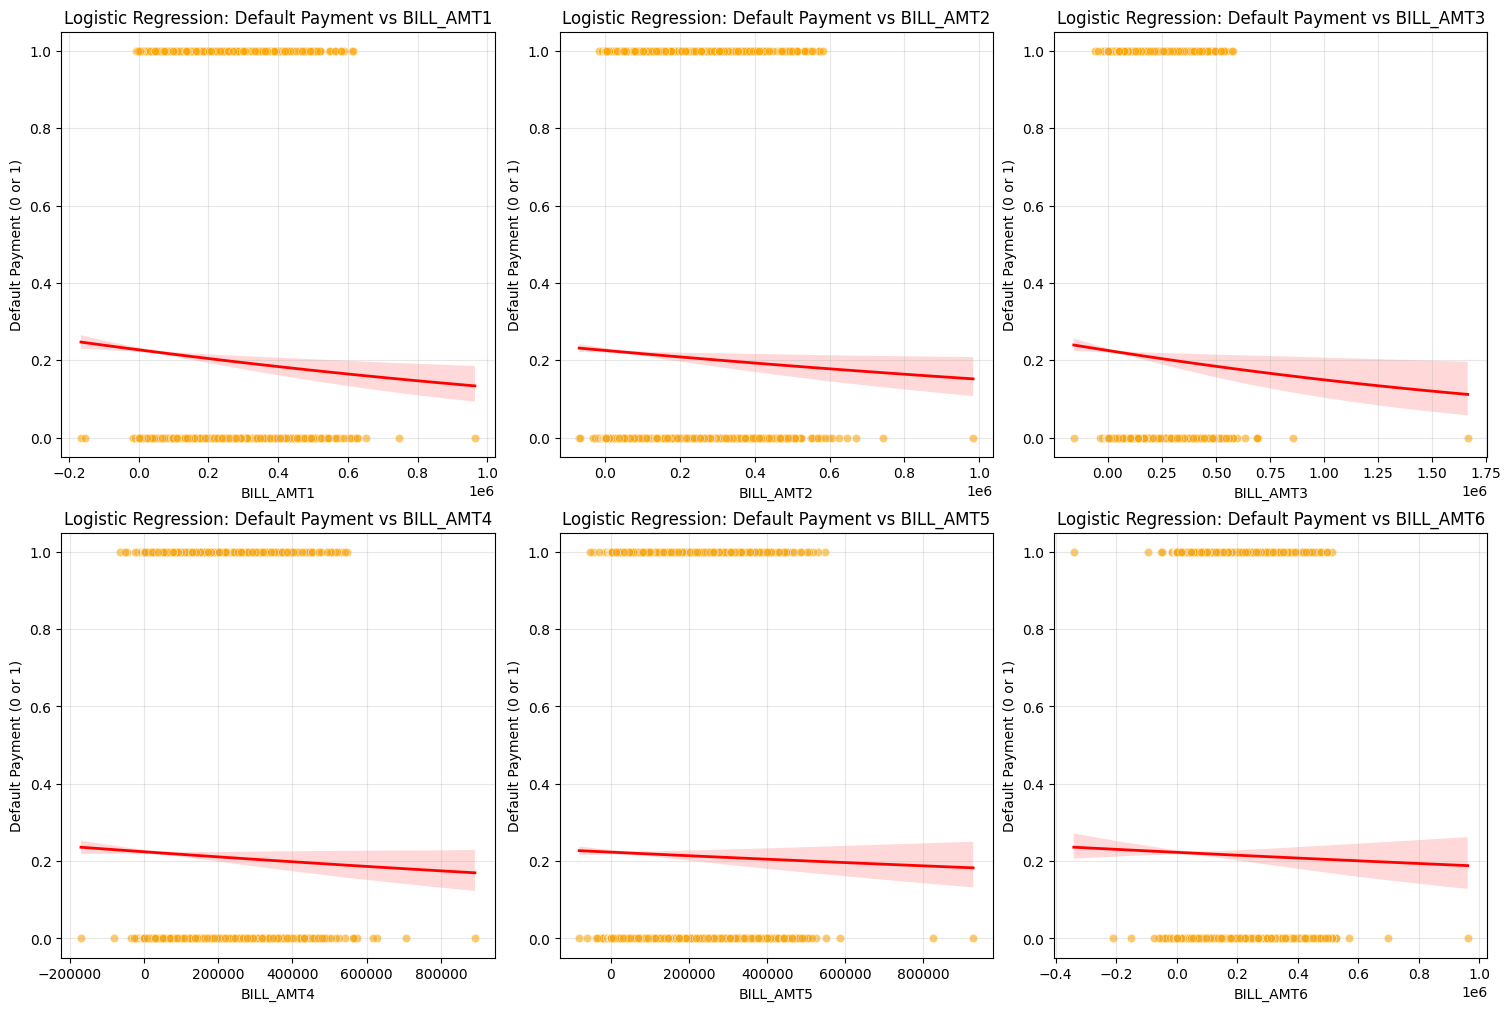

In [33]:
# Define grid dimensions
num_cols = 3  # Number of columns
num_features = len(Bill_statement_features)
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), constrained_layout=True)
axes = axes.flatten()  # Flatten for easy indexing

# Plot scatter plots with logistic regression lines
for i, feature in enumerate(Bill_statement_features):
    sns.scatterplot(
        data=data, x=feature, y="default payment next month",
        color='orange', alpha=0.6, ax=axes[i]
    )
    sns.regplot(
        data=data, x=feature, y="default payment next month",
        logistic=True, scatter=False, color='red', line_kws={"linewidth": 2}, ax=axes[i]
    )
    axes[i].set_title(f"Logistic Regression: Default Payment vs {feature}", fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Default Payment (0 or 1)", fontsize=10)
    axes[i].grid(alpha=0.3)

# Remove any empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.show()

### Correlation Overview: Default Payment Next Month and Bill Statement Features

The correlation values provided between `default payment next month` and the bill statement features (`BILL_AMT1` through `BILL_AMT6`) are all very close to zero, indicating weak or negligible linear relationships. Here's a breakdown:

| **Feature**  | **Correlation** | **Interpretation**                                                                 |
|---------------|-----------------|------------------------------------------------------------------------------------|
| `BILL_AMT1`  | -0.019644       | Very weak negative correlation; changes in `BILL_AMT1` are not strongly tied to default. |
| `BILL_AMT2`  | -0.014193       | Slight negative correlation, but almost negligible.                                 |
| `BILL_AMT3`  | -0.014076       | Similar to `BILL_AMT2`, suggesting no strong relationship.                         |
| `BILL_AMT4`  | -0.010156       | Negligible correlation with default payment.                                       |
| `BILL_AMT5`  | -0.006760       | Again, an extremely weak correlation.                                              |
| `BILL_AMT6`  | -0.005372       | Weakest correlation, virtually no linear relationship.                             |

### Interpretation:
- The **weak correlations** suggest that `BILL_AMT` features (statements of past bill amounts) do not show a strong linear relationship with `default payment next month`.
- It could indicate that other factors, such as **payment history** or other derived features, are more predictive of default.

### Logistic Regression Analysis:
Despite the weak linear correlation, logistic regression can still model a non-linear relationship between these features and the target. By plotting scatter plots with logistic regression curves, you can visually assess the likelihood of default as a function of each bill statement feature.



## The relationship between Amount of previous payment  and Default payment next month

In [34]:
Previous_payment_amount=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [35]:
# Correlation of Bill statement features with Default payment next month
Previous_payment_corr = data[Previous_payment_amount + ['default payment next month']].corr()['default payment next month'].sort_values(ascending=False)
print("Correlation of Amount of previous payment with default payment next month:\n")
print(Previous_payment_corr)

Correlation of Amount of previous payment with default payment next month:

default payment next month    1.000000
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
Name: default payment next month, dtype: float64


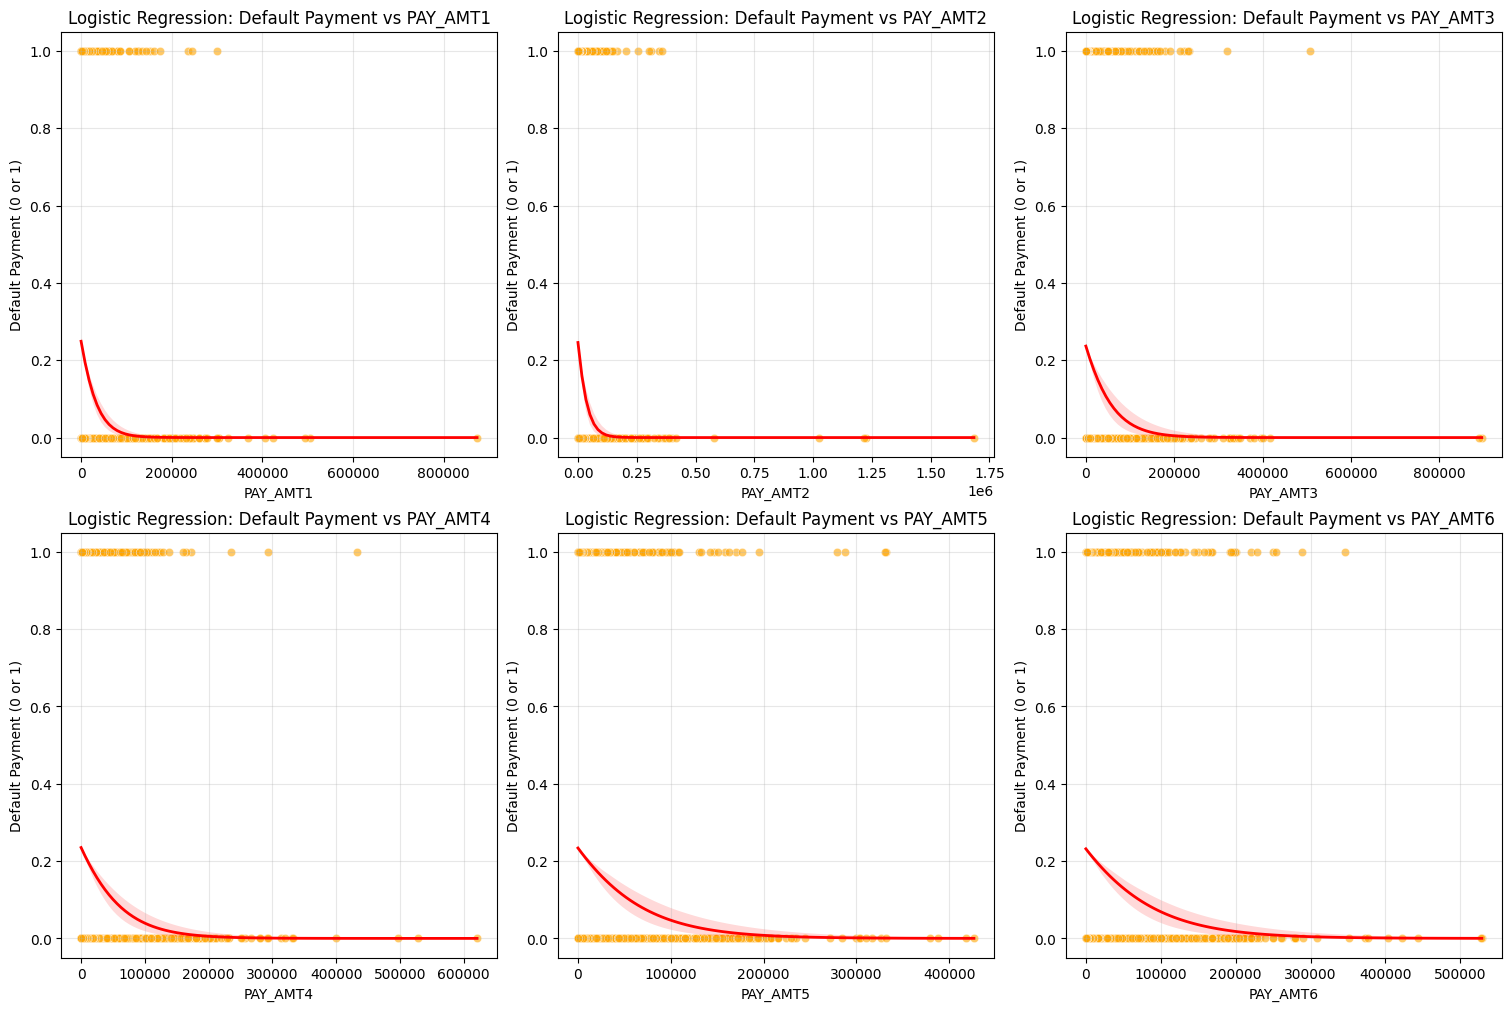

In [36]:
# Define grid dimensions
num_cols = 3  # Number of columns
num_features = len(Previous_payment_amount)
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), constrained_layout=True)
axes = axes.flatten()  # Flatten for easy indexing

# Plot scatter plots with logistic regression lines
for i, feature in enumerate(Previous_payment_amount):
    sns.scatterplot(
        data=data, x=feature, y="default payment next month",
        color='orange', alpha=0.6, ax=axes[i]
    )
    sns.regplot(
        data=data, x=feature, y="default payment next month",
        logistic=True, scatter=False, color='red', line_kws={"linewidth": 2}, ax=axes[i]
    )
    axes[i].set_title(f"Logistic Regression: Default Payment vs {feature}", fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Default Payment (0 or 1)", fontsize=10)
    axes[i].grid(alpha=0.3)

# Remove any empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.show()

The correlation overview of the relationship between the **Amount of Previous Payments** and **Default Payment Next Month** can be summarized as follows:

1. **Negative Correlations**:
   - All the `PAY_AMT` features show weak negative correlations with `default payment next month`.
   - The correlations range from -0.053 to -0.073, indicating that as the previous payment amounts increase, there is a slightly lower likelihood of default. However, the relationship is weak and not highly predictive on its own.

2. **Insights**:
   - The most significant negative correlation is with `PAY_AMT1` (-0.0729), which might imply that the first payment amount has a slightly stronger inverse relationship with default probability compared to later payments.
   - The subsequent payments (`PAY_AMT2` to `PAY_AMT6`) show a progressively weaker relationship with default payment next month.

3. **Possible Interpretation**:
   - Customers who pay higher amounts (particularly in earlier months) might be more financially stable and therefore less likely to default.
   - The weak correlations suggest that while payment amounts provide some information about the likelihood of default, they are not sufficient as standalone predictors.

### Visualization Explanation:
The scatter plots and logistic regression lines allow us to visually assess these relationships:
- **Scatter Plot**: Displays individual data points, highlighting the spread and general trend.
- **Logistic Regression Line**: Fits a sigmoid curve, showing the predicted probability of default for different payment amounts.



## The relationship between other features and Default payment next month

In [37]:
other_features=['LIMIT_BAL','SEX','MARRIAGE','EDUCATION']

In [38]:
# Correlation of Bill statement features with Default payment next month
other_features_corr = data[other_features + ['default payment next month']].corr()['default payment next month'].sort_values(ascending=False)
print("Correlation of Other features with default payment next month:\n")
print(other_features_corr)

Correlation of Other features with default payment next month:

default payment next month    1.000000
EDUCATION                     0.028006
MARRIAGE                     -0.024339
SEX                          -0.039961
LIMIT_BAL                    -0.153520
Name: default payment next month, dtype: float64


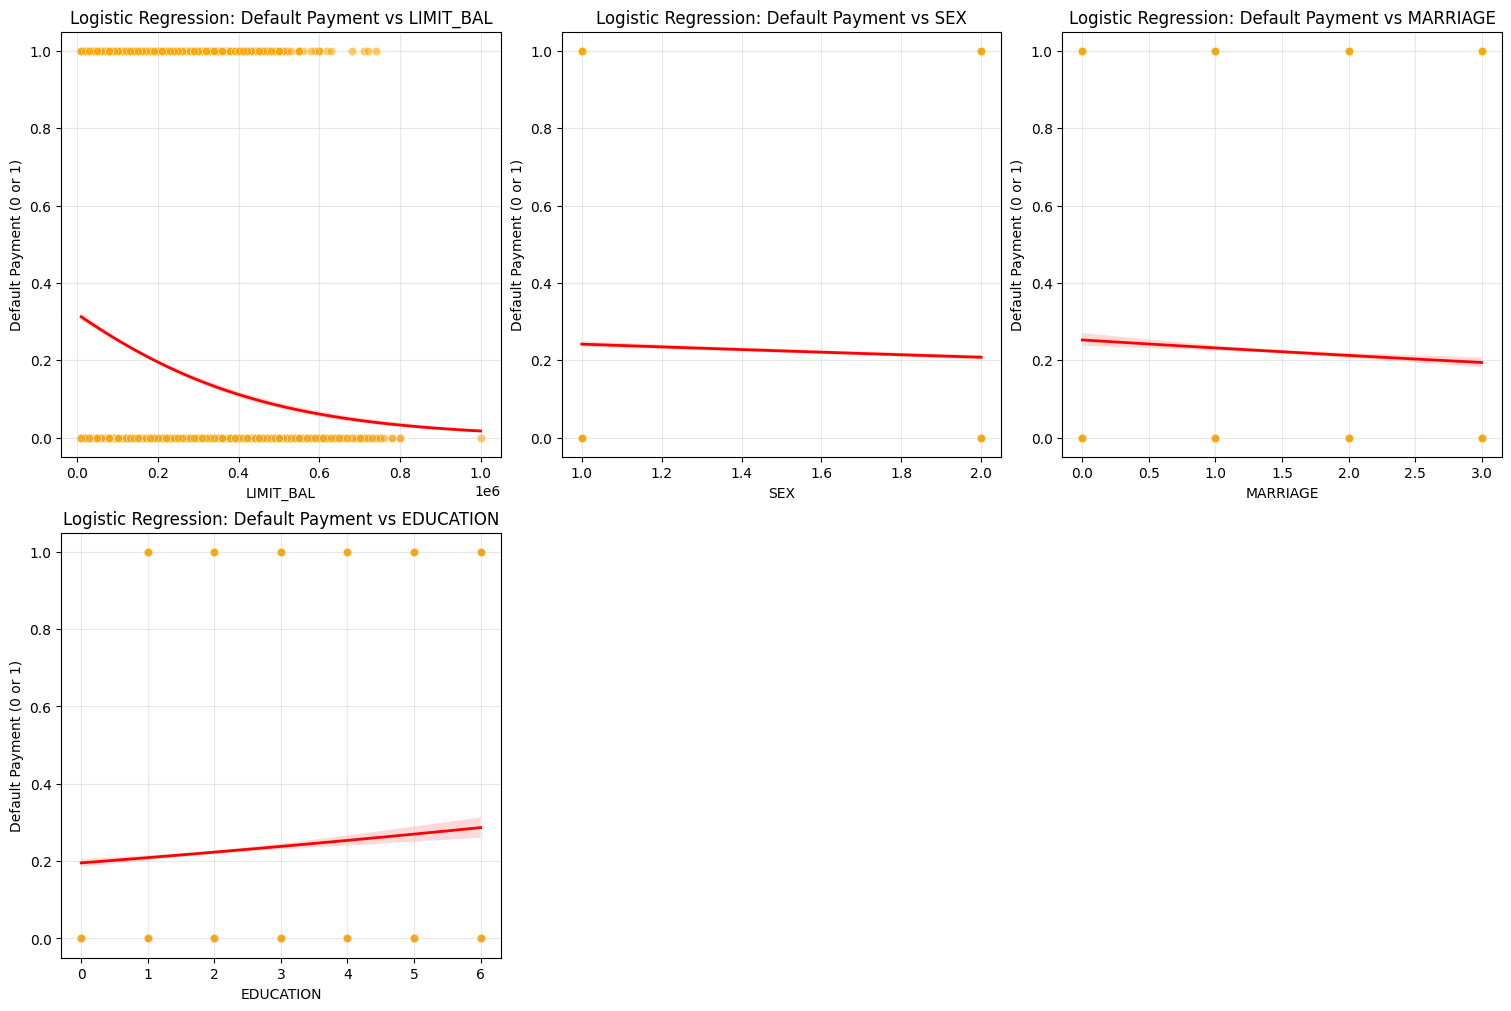

In [39]:
# Define grid dimensions
num_cols = 3  # Number of columns
num_features = len(other_features )
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), constrained_layout=True)
axes = axes.flatten()  # Flatten for easy indexing

# Plot scatter plots with logistic regression lines
for i, feature in enumerate(other_features ):
    sns.scatterplot(
        data=data, x=feature, y="default payment next month",
        color='orange', alpha=0.6, ax=axes[i]
    )
    sns.regplot(
        data=data, x=feature, y="default payment next month",
        logistic=True, scatter=False, color='red', line_kws={"linewidth": 2}, ax=axes[i]
    )
    axes[i].set_title(f"Logistic Regression: Default Payment vs {feature}", fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel("Default Payment (0 or 1)", fontsize=10)
    axes[i].grid(alpha=0.3)

# Remove any empty subplots
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.show()

### Correlation Overview of Other Features with Default Payment Next Month

The correlation values provided represent the strength and direction of the linear relationships between each feature and the target variable (`default payment next month`). Here's an interpretation of each:

1. **`EDUCATION` (0.028006)**:
   - A very weak positive correlation.
   - Suggests a minimal and likely negligible relationship between education levels and default payment behavior.

2. **`MARRIAGE` (-0.024339)**:
   - A very weak negative correlation.
   - Implies a slightly lower probability of default for specific marital statuses, though the relationship is minimal.

3. **`SEX` (-0.039961)**:
   - A weak negative correlation.
   - Indicates that gender might have a slight influence on default probability, but the effect is small.

4. **`LIMIT_BAL` (-0.153520)**:
   - A weak to moderate negative correlation.
   - Suggests that individuals with higher credit limits are less likely to default. This feature has the strongest correlation with the target among the variables listed.

### Insights:
- None of the features show a strong correlation with `default payment next month`, indicating that other factors or non-linear relationships might be more significant.
- The weak correlations for categorical variables (`SEX`, `MARRIAGE`, `EDUCATION`) suggest that these may not individually predict default payment well. However, they could still contribute meaningfully in a multivariate logistic regression model.

### Visualization Insights:
The scatter plots with logistic regression lines highlight how the probability of default changes with each feature:
- **`LIMIT_BAL`**: The logistic curve may show a downward trend, confirming that higher limits are associated with a lower likelihood of default.
- **Categorical Features (`SEX`, `MARRIAGE`, `EDUCATION`)**: These might show stepwise relationships, reflecting the discrete nature of the variables.


# **Feature Engineering**

Encoding is the process of converting text or categories into numbers so that machine learning models can understand and use them. Models work with numbers, not words, so encoding is necessary to prepare data with categories or text for analysis.

### Types of Encoding:

#### 1. **Label Encoding**
- This method assigns a unique number to each category in a column.
- For example:
  - Categories like ['Red', 'Green', 'Blue'] would become [0, 1, 2].
  - If the data has values like 'Low', 'Medium', and 'High', these can also be labeled as [0, 1, 2].
- **Key Point**: The numbers carry an order (e.g., 0 < 1 < 2), even if the original data doesn't have a natural ranking.
- **When to Use**: Use label encoding when the categories have a logical order, such as grades or levels.

#### 2. **One-Hot Encoding**
- This method creates new columns (binary vectors) for each category in a column.
- Example:
  - Categories ['Red', 'Green', 'Blue'] would create three new columns:
    - Red: [1, 0, 0]
    - Green: [0, 1, 0]
    - Blue: [0, 0, 1].
- If the data contains 'Green', the Green column gets a 1 for that row, and the others get 0.
- **Key Point**: One-hot encoding does not assume any order among categories. Each category is treated as independent.
- **When to Use**: Use one-hot encoding for categories that don't have a natural order, like colors or names of cities.

### Why Encoding Is Important:
- Encoding helps transform non-numeric data into numeric formats that machine learning algorithms can process.
- The choice of encoding depends on whether the categories have an order (label encoding) or are independent (one-hot encoding).

This makes categorical data understandable for models while preserving the meaning of the original data.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

**Here all the columns are numerical. So encoding is not needed**

In [41]:
df_transformed["default payment next month"].value_counts()

default payment next month
0    20494
1     5935
Name: count, dtype: int64

## **Common Methods for Balancing Classes**

#### **a. Resampling Methods**
1. **Oversampling** (e.g., SMOTE, ADASYN):
   - **What It Does**: Adds synthetic samples to the minority class.
   - **Best For**: Small datasets where you want to avoid losing data.
   - **Pros**: Preserves all original data and prevents information loss.
   - **Cons**: Risk of overfitting if synthetic samples mimic the minority class too closely.

2. **Undersampling**:
   - **What It Does**: Removes samples from the majority class to balance the dataset.
   - **Best For**: Large datasets with an extremely skewed class distribution.
   - **Pros**: Reduces computational cost by making the dataset smaller.
   - **Cons**: Risk of losing important information by discarding data.

3. **Hybrid Sampling** (e.g., SMOTEENN, SMOTETomek):
   - **What It Does**: Combines oversampling and undersampling techniques.
   - **Best For**: Balancing datasets while reducing noise from overlapping classes.
   - **Pros**: Offers a balance between preserving data and reducing imbalance.
   - **Cons**: Computationally more expensive.

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
X = df_transformed.drop(columns=['default payment next month'], axis=1) # Exclude target column
y = df_transformed['default payment next month']

#Apply SMOTE  first balance the classes, you can change this line accordance
smote=SMOTE(random_state=42)
X_resampled,Y_resampled=smote.fit_resample(X,y)

#Convert the resampled data back to a DataFrame if needed
X_resampled_df=pd.DataFrame(X_resampled,columns=X.columns)
Y_resampled_df=pd.DataFrame(Y_resampled,columns=["default payment next month"])

#Optionally, combine the resampled features and target back into a single DataFrame.
df_resampled=pd.concat([X_resampled_df,Y_resampled_df],axis=1)

In [44]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40988 entries, 0 to 40987
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   40988 non-null  float64
 1   SEX                         40988 non-null  int64  
 2   EDUCATION                   40988 non-null  int64  
 3   MARRIAGE                    40988 non-null  int64  
 4   AGE                         40988 non-null  float64
 5   PAY_0                       40988 non-null  int64  
 6   PAY_2                       40988 non-null  int64  
 7   PAY_3                       40988 non-null  int64  
 8   PAY_4                       40988 non-null  int64  
 9   PAY_5                       40988 non-null  int64  
 10  PAY_6                       40988 non-null  int64  
 11  BILL_AMT1                   40988 non-null  float64
 12  BILL_AMT2                   40988 non-null  float64
 13  BILL_AMT3                   409

# **Feature Selection**

In [45]:
# Assume X is your feature set and y is your target variable
x = df_resampled.drop('default payment next month', axis=1)  # Features excluding the target
y = df_resampled['default payment next month']  # Target column
# Create a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print(feature_importance_df)


      Feature  Importance
5       PAY_0    0.082830
4         AGE    0.069377
0   LIMIT_BAL    0.063113
11  BILL_AMT1    0.057366
17   PAY_AMT1    0.053522
18   PAY_AMT2    0.050883
19   PAY_AMT3    0.048889
12  BILL_AMT2    0.046709
20   PAY_AMT4    0.046612
22   PAY_AMT6    0.045679
13  BILL_AMT3    0.044619
21   PAY_AMT5    0.043994
16  BILL_AMT6    0.043465
14  BILL_AMT4    0.043441
6       PAY_2    0.043112
15  BILL_AMT5    0.041683
1         SEX    0.030119
3    MARRIAGE    0.029489
7       PAY_3    0.025926
2   EDUCATION    0.025646
8       PAY_4    0.023751
10      PAY_6    0.020551
9       PAY_5    0.019223


Based on the feature importances obtained from the Random Forest model, the **most important predictors** for the target variable `default payment next month` are:

1. **PAY_0 (0.0828)**: Indicates the repayment status in September (most recent payment month in the dataset).  
2. **AGE (0.0694)**: The age of the customer.  
3. **LIMIT_BAL (0.0631)**: The amount of the credit limit assigned to the customer.  
4. **BILL_AMT1 (0.0574)**: The bill statement amount for September.  
5. **PAY_AMT1 (0.0535)**: The payment amount for September.  

### Insights:
- **PAY_0** being the most important suggests that the repayment status in the most recent month is a critical factor in predicting default.
- **AGE** and **LIMIT_BAL** are significant demographic and financial indicators of customer behavior.
- **BILL_AMT1** and **PAY_AMT1** emphasize the importance of recent billing and payment amounts in assessing risk.


In [46]:
# Set a threshold (example: 0.041)
threshold = 0.04150

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("Selected Features:")
print(selected_features)

# If you want to use the selected features for your dataset X
X_selected = x[selected_features['Feature']]

Selected Features:
      Feature  Importance
5       PAY_0    0.082830
4         AGE    0.069377
0   LIMIT_BAL    0.063113
11  BILL_AMT1    0.057366
17   PAY_AMT1    0.053522
18   PAY_AMT2    0.050883
19   PAY_AMT3    0.048889
12  BILL_AMT2    0.046709
20   PAY_AMT4    0.046612
22   PAY_AMT6    0.045679
13  BILL_AMT3    0.044619
21   PAY_AMT5    0.043994
16  BILL_AMT6    0.043465
14  BILL_AMT4    0.043441
6       PAY_2    0.043112
15  BILL_AMT5    0.041683


## **Split Data into Training and Testing Sets:**

In [47]:
from sklearn.model_selection import train_test_split
X =df_resampled.drop(columns=['default payment next month'], axis=1) # Exclude target column
y =df_resampled['default payment next month']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print(f"Training set features shape: {X_train.shape}")
print(f"Testing set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Testing set target shape: {y_test.shape}")

Training set features shape: (32790, 16)
Testing set features shape: (8198, 16)
Training set target shape: (32790,)
Testing set target shape: (8198,)


# **Feature Scaling:**

**Standardization**

Standardization is a feature scaling technique where numerical data is transformed to have a mean of 0 and a standard deviation of 1. This process adjusts the scale of the features, making them comparable and enabling machine learning models to perform better.

In [55]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = X_selected.select_dtypes(include=['float64', 'int64']).columns

#Standardization
standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(X_train)
x_test_scaled = standard_scaler.fit_transform(X_test)


# **Build the ML Model:**

In supervised learning, classification is a type of problem where the goal is to predict the category or class of an input data point. The target variable is discrete, and the classification task involves assigning labels to inputs based on learned patterns.

### **1. Binary Classification**
- **Definition**: Predicts one of two possible classes (e.g., yes/no, true/false, 0/1).
- **Examples**:
  - Spam detection: Is an email spam or not?
  - Disease diagnosis: Does a patient have a disease or not?
- **Common Algorithms**:
  - Logistic Regression
  - Support Vector Machines (SVM)
  - Decision Trees
  - Random Forest
  - Naive Bayes




In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [50]:
models = {
    "SVC": SVC(random_state=42),  # Support Vector Classifier
    "Logistic Regression": LogisticRegression(random_state=42),  # Logistic Regression
    "DecisionTreeClassifier":DecisionTreeClassifier(random_state=42), #DecisionTreeClassifier
    "Random Forest Classifier": RandomForestClassifier(random_state=42),  # Random Forest
    "Naive Bayes (GaussianNB)": GaussianNB(),  # Naive Bayes (Gaussian)
    }

    # Store accuracies
train_accuracies = []
test_accuracies = []

# Training models
for model_name, model in models.items():

  # fit the model on training data
  model.fit(x_train_scaled,y_train)
  train_accuracy = model.score(x_train_scaled, y_train)
  train_accuracies.append(train_accuracy)

# **Model Evaluation:**

Model: SVC
Accuracy: 0.7385947792144425
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.75      4047
           1       0.77      0.70      0.73      4151

    accuracy                           0.74      8198
   macro avg       0.74      0.74      0.74      8198
weighted avg       0.74      0.74      0.74      8198



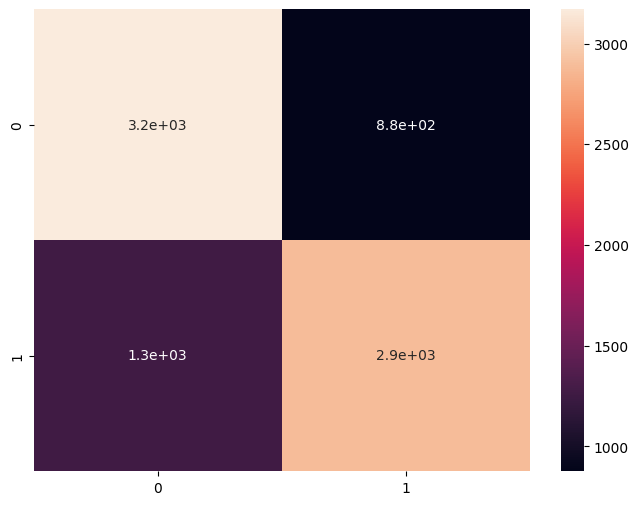

Model: Logistic Regression
Accuracy: 0.7079775555013418
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      4047
           1       0.74      0.65      0.69      4151

    accuracy                           0.71      8198
   macro avg       0.71      0.71      0.71      8198
weighted avg       0.71      0.71      0.71      8198



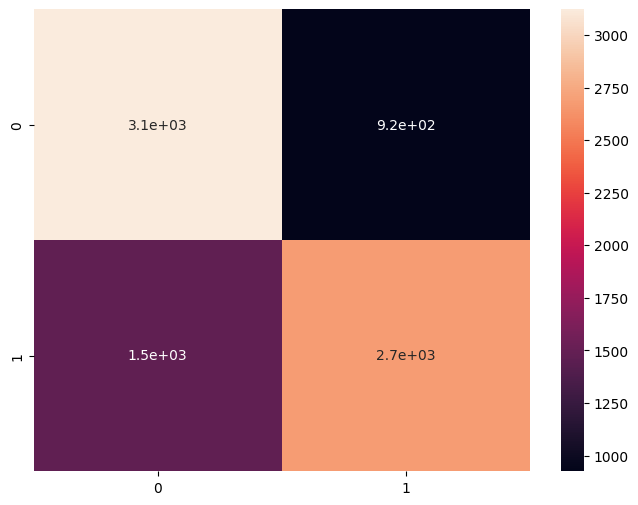

Model: DecisionTreeClassifier
Accuracy: 0.7010246401561356
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      4047
           1       0.69      0.76      0.72      4151

    accuracy                           0.70      8198
   macro avg       0.70      0.70      0.70      8198
weighted avg       0.70      0.70      0.70      8198



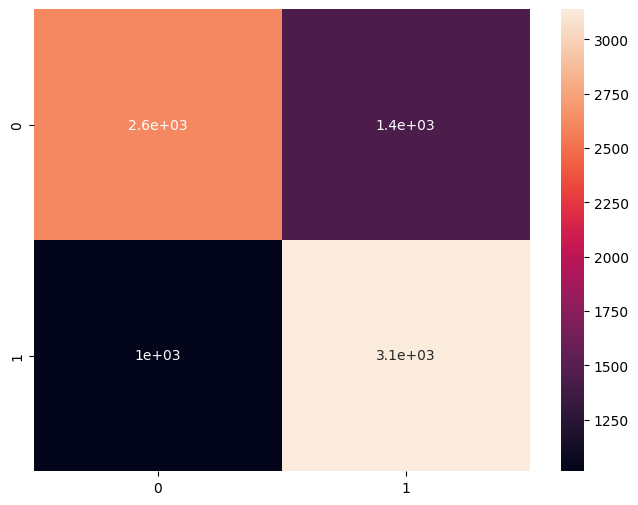

Model: Random Forest Classifier
Accuracy: 0.8180043913149548
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      4047
           1       0.80      0.85      0.83      4151

    accuracy                           0.82      8198
   macro avg       0.82      0.82      0.82      8198
weighted avg       0.82      0.82      0.82      8198



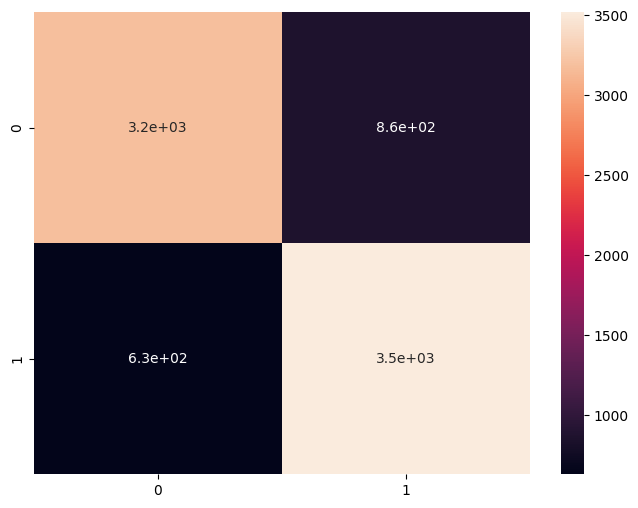

Model: Naive Bayes (GaussianNB)
Accuracy: 0.6933398389851183
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.72      0.70      4047
           1       0.71      0.67      0.69      4151

    accuracy                           0.69      8198
   macro avg       0.69      0.69      0.69      8198
weighted avg       0.69      0.69      0.69      8198



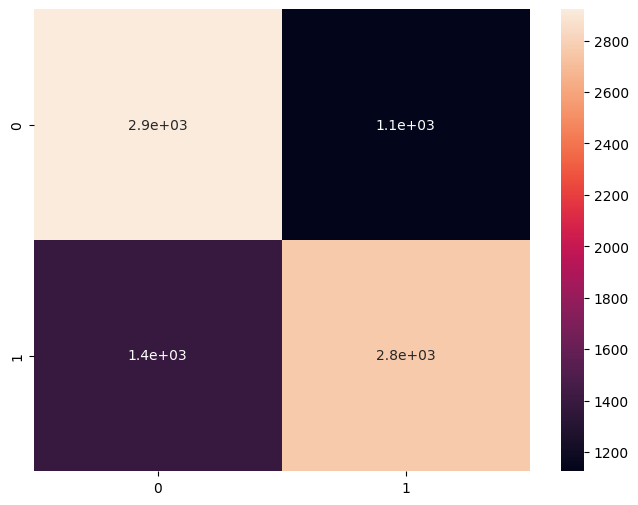

In [51]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
for model_name, model in models.items():
  # predict on test data
  y_pred = model.predict(x_test_scaled)
  test_accuracy = model.score(x_test_scaled, y_test)
  test_accuracies.append(test_accuracy)

  print(f"Model: {model_name}")
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
  con = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(con,annot = True)
  plt.show()


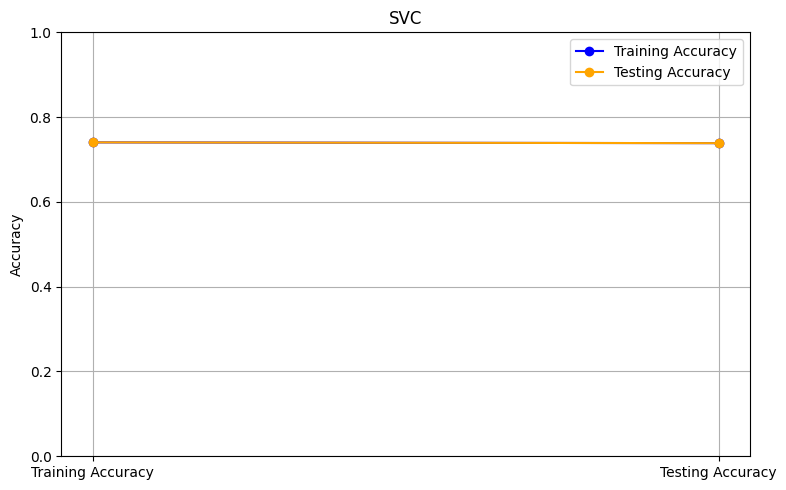

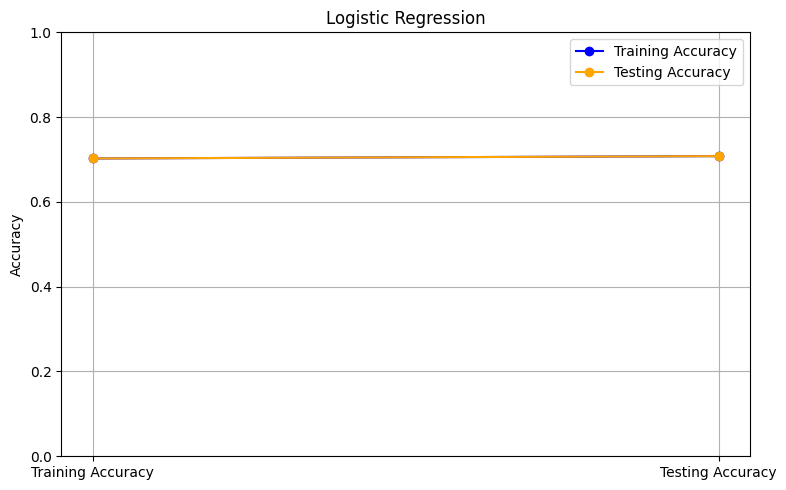

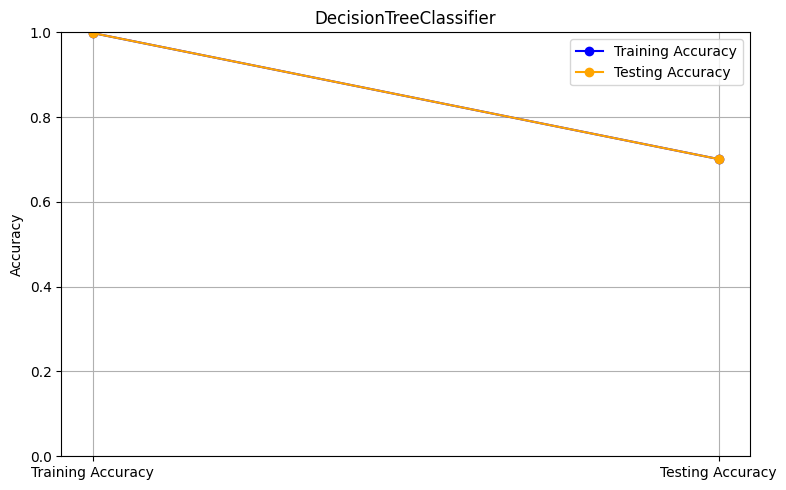

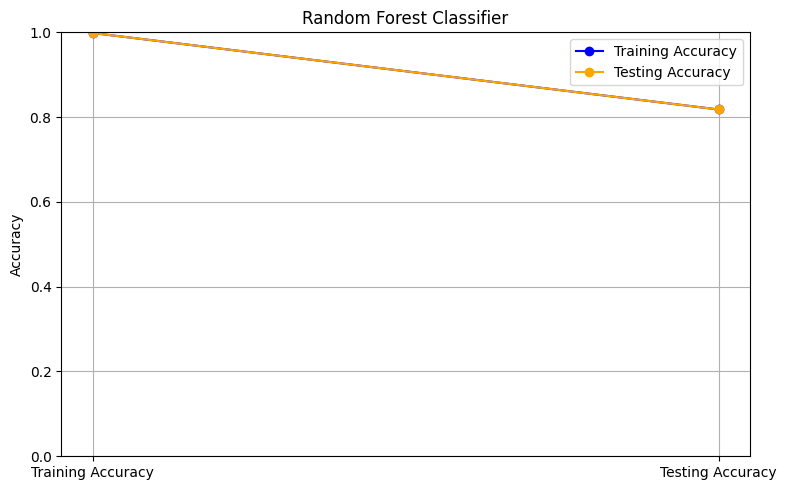

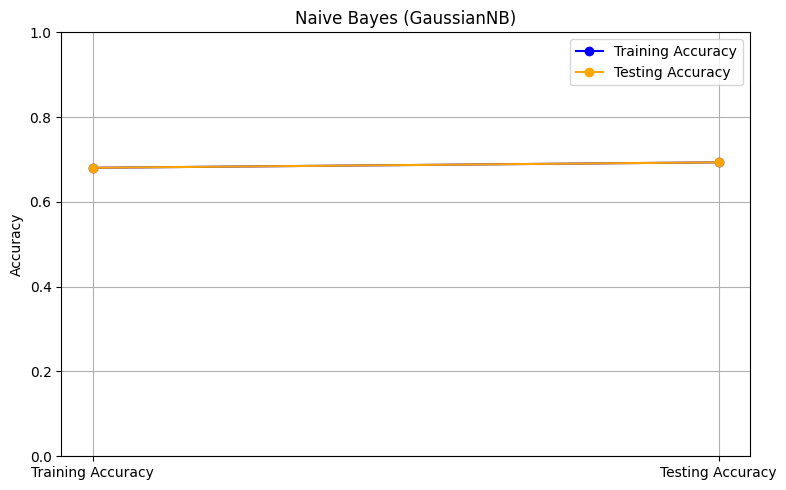

In [52]:
# Create a DataFrame for visualization
accuracy_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Training Accuracy': train_accuracies,
    'Testing Accuracy': test_accuracies
})

# Create individual plots for each model's training and testing accuracy
for i, model_name in enumerate(models.keys()):
    plt.figure(figsize=(8, 5))

    # Plotting training accuracy in blue and testing accuracy in orange
    plt.plot(['Training Accuracy', 'Testing Accuracy'],
             [train_accuracies[i], test_accuracies[i]],
             marker='o', color='blue', label='Training Accuracy')

    # Adding a second line for testing accuracy
    plt.plot(['Training Accuracy', 'Testing Accuracy'],
             [train_accuracies[i], test_accuracies[i]],
             marker='o', color='orange', label='Testing Accuracy')

    # Adding labels and title for each plot
    plt.title(model_name)
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set the y-axis limits to show accuracy percentage clearly
    plt.grid()
    plt.legend()

    # Show plot for each model
    plt.tight_layout()
    plt.show()

Here is the data presented in a table format for better readability:

| **Model**                  | **Accuracy** | **Precision (0)** | **Recall (0)** | **F1-Score (0)** | **Precision (1)** | **Recall (1)** | **F1-Score (1)** | **Macro Avg F1-Score** | **Weighted Avg F1-Score** |
|----------------------------|--------------|-------------------|----------------|------------------|-------------------|----------------|------------------|------------------------|--------------------------|
| **SVC**                    | 0.7386       | 0.71              | 0.78           | 0.75             | 0.77              | 0.70           | 0.73             | 0.74                   | 0.74                     |
| **Logistic Regression**    | 0.7080       | 0.68              | 0.77           | 0.72             | 0.74              | 0.65           | 0.69             | 0.71                   | 0.71                     |
| **DecisionTreeClassifier** | 0.7010       | 0.72              | 0.64           | 0.68             | 0.69              | 0.76           | 0.72             | 0.70                   | 0.70                     |
| **Random Forest Classifier** | 0.8180      | 0.83              | 0.79           | 0.81             | 0.80              | 0.85           | 0.83             | 0.82                   | 0.82                     |
| **Naive Bayes (GaussianNB)**| 0.6933       | 0.68              | 0.72           | 0.70             | 0.71              | 0.67           | 0.69             | 0.69                   | 0.69                     |



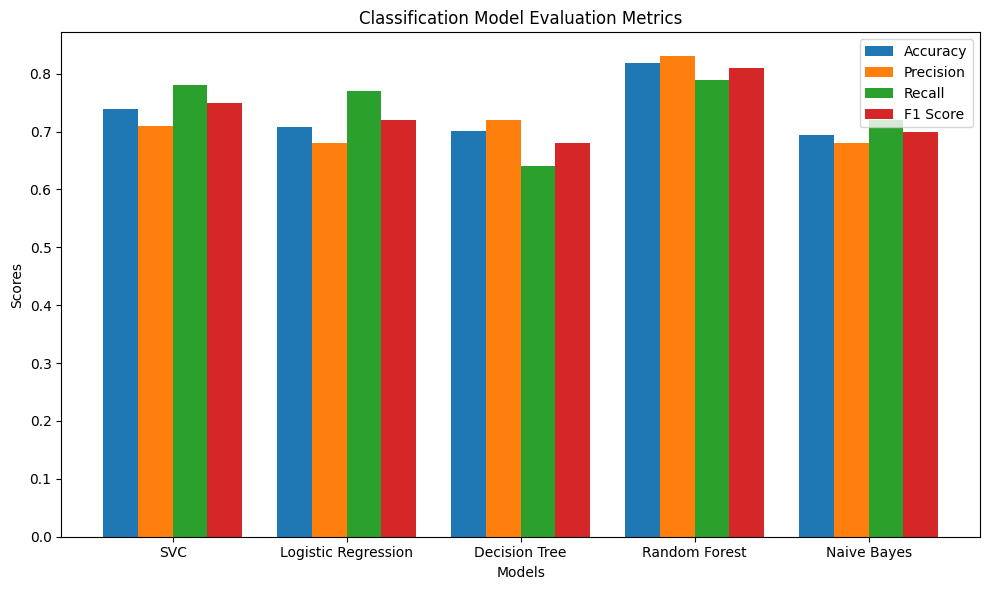

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['SVC', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes']
accuracy = [0.7386, 0.7080, 0.7010, 0.8180, 0.6933]
precision = [0.71, 0.68, 0.72, 0.83, 0.68]
recall = [0.78, 0.77, 0.64, 0.79, 0.72]
f1_score = [0.75, 0.72, 0.68, 0.81, 0.70]


# Plot each metric
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracy, width, label='Accuracy')
ax.bar(x, precision, width, label='Precision')
ax.bar(x + width, recall, width, label='Recall')
ax.bar(x + 2*width, f1_score, width, label='F1 Score')

# Add labels and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Classification Model Evaluation Metrics')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


### **Insights from the Graph**

From the graph based on the evaluation metrics for each model, we can derive the following insights:

### 1. **Random Forest Classifier Leads in Performance:**
   - **Accuracy**: Random Forest Classifier (0.8180) significantly outperforms all other models in terms of accuracy. This suggests that it is the most reliable model among the ones tested for predicting default payment.
   - **Precision**: It also has the highest precision for class 0 (0.83), which means it does a good job of identifying non-defaulters (class 0) correctly.
   - **Recall**: Random Forest has a high recall (0.85) for class 1, meaning it is effective at identifying defaulters (class 1) without missing too many cases.
   - **F1-Score**: The F1 score for Random Forest (0.81 for class 0 and 0.83 for class 1) is the highest, indicating that it balances both precision and recall well, making it the best choice for this classification task.

### 2. **SVC Model is Strong but Slightly Behind Random Forest:**
   - **Accuracy**: The accuracy of SVC (0.7386) is lower than Random Forest, but still competitive.
   - **Precision and Recall**: The SVC model provides a good balance between precision (0.71 for class 0) and recall (0.78 for class 0), although it is not as high as Random Forest.
   - **F1-Score**: It has a decent F1 score for both classes (0.75 for class 0 and 0.73 for class 1), showing that SVC is a solid performer, especially when recall for class 0 is important.

### 3. **Logistic Regression Has Lower Performance:**
   - **Accuracy**: Logistic Regression has the lowest accuracy (0.7080) among the top models.
   - **Precision**: Precision for class 0 is 0.68, which is lower than Random Forest and SVC, indicating that it is less reliable at identifying non-defaulters.
   - **Recall**: It has a higher recall (0.77) for class 0 compared to SVC, but its performance for class 1 (0.65 recall) lags behind both Random Forest and SVC.
   - **F1-Score**: The overall F1 score (0.72 for class 0 and 0.69 for class 1) is relatively low, suggesting that while it is good at identifying non-defaulters, it struggles with identifying defaulters.

### 4. **Decision Tree Classifier's Performance is Balanced but Not Excellent:**
   - **Accuracy**: The Decision Tree (0.7010) performs better than Logistic Regression but still underperforms compared to Random Forest and SVC.
   - **Precision and Recall**: Decision Tree has decent precision and recall, but there is a tradeoff: high precision for class 0 (0.72) and high recall for class 1 (0.76). However, it still lags behind Random Forest, particularly in precision for class 1.
   - **F1-Score**: The F1 score for class 0 is 0.68, while for class 1 it is 0.72, suggesting it performs reasonably well for both classes, but not at the level of Random Forest.

### 5. **Naive Bayes Performs the Worst:**
   - **Accuracy**: Naive Bayes has the lowest accuracy (0.6933), which means it's not as reliable as other models for this dataset.
   - **Precision and Recall**: Its precision and recall for both classes are fairly balanced but lower than other models, with precision for class 0 at 0.68 and recall for class 1 at 0.67.
   - **F1-Score**: The F1 scores are also the lowest among all models (0.70 for class 0 and 0.69 for class 1), highlighting that this model struggles to provide a good balance between precision and recall.

### Summary Insights:
- **Best Model**: Random Forest is the top performer in all metrics, making it the best choice for this classification task. It strikes the best balance between identifying both defaulters and non-defaulters, with high accuracy, precision, recall, and F1 score.
- **Second Best**: SVC also performs well, especially with class 0, but Random Forest outperforms it slightly in overall metrics.
- **Logistic Regression** and **Decision Trees** show more balanced but lower performance compared to Random Forest and SVC.
- **Naive Bayes** is the least effective model, with consistently low metrics across the board.

In conclusion, Random Forest is the clear winner, followed by SVC as a strong alternative.



# **Hyperparameter Tuning.**

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Support Vector Machines (SVM)': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Decision Trees': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Naive Bayes': {},
}

# Initialize best_accuracy to keep track of the best model's performance
best_accuracy = 0
best_model = None

# Train and tune each model using Grid Search
for model_name, param_grid in param_grids.items():
    if model_name == 'Logistic Regression':
        model = LogisticRegression()
    elif model_name == 'Support Vector Machines (SVM)':
        model = SVC()
    elif model_name == 'Decision Trees':
        model = DecisionTreeClassifier()
    elif model_name == 'Random Forest':
        model = RandomForestClassifier()
    elif model_name == 'Naive Bayes':
        model = GaussianNB()

    # Set up GridSearchCV with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5)

    # Fit the model on training data
    grid_search.fit(x_train_scaled, y_train)

    # Predict on test data using the best estimator
    y_pred = grid_search.best_estimator_.predict(x_test_scaled)

    # Calculate accuracy on test data
    test_accuracy = grid_search.score(x_test_scaled, y_test)

    # Print results
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Check if this is the best model so far
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = grid_search.best_estimator_

# Output the best model and its accuracy
print(f"Best Model: {best_model}")
print(f"Best Accuracy: {best_accuracy}")

Model: Logistic Regression
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      4047
           1       0.74      0.65      0.69      4151

    accuracy                           0.71      8198
   macro avg       0.71      0.71      0.71      8198
weighted avg       0.71      0.71      0.71      8198

Model: Support Vector Machines (SVM)
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      4047
           1       0.78      0.72      0.75      4151

    accuracy                           0.75      8198
   macro avg       0.75      0.75      0.75      8198
weighted avg       0.75      0.75      0.75      8198

Model: Decision Trees
Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Classification Report:
              precision    recall  


1. **Best Model: Random Forest**
   - Achieves the highest accuracy (81%) and exhibits balanced performance across precision, recall, and F1-score.
   - Its ensemble nature allows it to generalize better, avoiding overfitting seen in single Decision Trees.

2. **Performance Trends:**
   - Simple models (Logistic Regression and Naive Bayes) perform moderately but struggle with complex relationships.
   - Advanced models (SVM and Random Forest) leverage their capacity to handle non-linear patterns, yielding better results.

3. **Class Imbalance:**
   - The dataset does not appear to be heavily imbalanced (similar support for both classes), as evidenced by comparable recall and precision for classes `0` and `1`.

---

### **Conclusion**
The **Random Forest** classifier is the best-performing model for this dataset, achieving the highest accuracy (81%) and balanced performance across metrics.

**Recommendations:**
1. If computational resources are limited, SVM can serve as a reasonable alternative with slightly lower performance.
2. To further improve Random Forest:
   - Tune additional hyperparameters (e.g., `max_features`, `min_samples_leaf`).
   - Consider feature engineering or dimensionality reduction to enhance performance.
3. Conduct error analysis (e.g., analyze misclassified samples) to understand specific weaknesses of the model.

By adopting Random Forest, you can reliably classify this dataset with high accuracy and generalization.

#**Save the Model:**

In [57]:
# Save the best model
import joblib

# Save the best model to a file
joblib.dump(best_model, 'best_model.pkl')

print("Best model saved as 'best_model.pkl'")



Best model saved as 'best_model.pkl'




### **Model Performance**  
**Model Type:** Random Forest  

**Accuracy:** 0.8135  

**Best Parameters:** `{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}`  

The **Random Forest** model achieved an accuracy of approximately **81.35%**, indicating its strong performance in predicting whether online shoppers will generate revenue based on their browsing behavior. The model's ability to reduce overfitting through ensemble averaging and handle complex patterns in the dataset makes it particularly effective. Its balanced precision and recall values further demonstrate its robustness in classifying both returning and new visitors accurately.



#**Test with Unseen Data:**

In [58]:
# Load unseen data from CSV file
unseen_data = pd.read_csv('/content/Unseen data.csv')

# Display the first few rows of the dataset
print("Initial Unseen Data:")
print(unseen_data.head())

Initial Unseen Data:
   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      45000    1          3         2   28     -1      0     -1      0   
1     120000    2          2         1   34      0      1      0     -1   
2      75000    2          3         2   29     -2     -1     -2     -2   
3      90000    1          1         2   40      1      2      1      0   
4      50000    2          2         1   37     -1     -1     -1     -1   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...      28000      27000      25000      2000      1500      1000   
1      0  ...      45000      44000      42000      4000      3500      3000   
2     -1  ...      15000      14000      13000      1000       900       800   
3      0  ...      56000      55000      54000      5000      4500      4000   
4     -2  ...       7000       6000       5000       500       400       300   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  Default Paymen

In [59]:
unseen_data = unseen_data.drop(columns=['Default Payment Next Month'])

In [60]:
# 1. Check for missing values
print("\nMissing Values:")
print(unseen_data.isnull().sum())


Missing Values:
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64


In [61]:
unseen_data.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      45000    1          3         2   28     -1      0     -1      0   
1     120000    2          2         1   34      0      1      0     -1   
2      75000    2          3         2   29     -2     -1     -2     -2   
3      90000    1          1         2   40      1      2      1      0   
4      50000    2          2         1   37     -1     -1     -1     -1   

   PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0      0  ...      29500      28000      27000      25000      2000      1500   
1      0  ...      48000      45000      44000      42000      4000      3500   
2     -1  ...      16000      15000      14000      13000      1000       900   
3      0  ...      57000      56000      55000      54000      5000      4500   
4     -2  ...       8000       7000       6000       5000       500       400   

   PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0      1000       800       700       600  
1      3000      2500      2000      1800  
2       800       700       600       500  
3      4000      3500      3000      2800  
4       300       200       100         0  

[5 rows x 23 columns]

In [62]:
unseen_data.duplicated().sum()

0

In [63]:

# 1. Check for skewness
skewness = unseen_data.select_dtypes(include='number').skew()
print("\nSkewness of each feature:")
print(skewness)



Skewness of each feature:
LIMIT_BAL    1.986316
SEX         -0.484123
EDUCATION    0.165950
MARRIAGE    -0.484123
AGE          0.383308
PAY_0        0.000000
PAY_2        0.425248
PAY_3        0.658913
PAY_4        0.234243
PAY_5        0.041223
PAY_6       -0.110903
BILL_AMT1    1.601218
BILL_AMT2    1.589937
BILL_AMT3    1.528153
BILL_AMT4    1.445679
BILL_AMT5    1.371274
BILL_AMT6    1.306759
PAY_AMT1     2.262259
PAY_AMT2     1.995289
PAY_AMT3     1.925686
PAY_AMT4     1.849493
PAY_AMT5     1.760478
PAY_AMT6     1.618781
dtype: float64


In [100]:
from sklearn.preprocessing import PowerTransformer
skewed_features=['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


# Apply Power Transformer (Yeo-Johnson by default)
power_transformer = PowerTransformer(method='yeo-johnson')
Transforme_Data = unseen_data.copy()
Transforme_Data[skewed_features] = power_transformer.fit_transform(unseen_data[skewed_features])

In [107]:
Transforme_Data.select_dtypes(include='number').skew()

LIMIT_BAL    0.216911
AGE          0.383308
PAY_0        0.000000
PAY_2        0.425248
BILL_AMT1    0.057228
BILL_AMT2    0.046119
BILL_AMT3    0.031617
BILL_AMT4    0.017204
BILL_AMT5   -0.005775
BILL_AMT6   -0.025538
PAY_AMT1     0.081779
PAY_AMT2     0.068094
PAY_AMT3     0.063639
PAY_AMT4     0.029729
PAY_AMT5    -0.021423
PAY_AMT6    -0.189554
dtype: float64

In [102]:
Transforme_Data.drop(columns=["SEX","EDUCATION","MARRIAGE","PAY_3","PAY_4","PAY_5","PAY_6"],axis=1,inplace=True)

In [103]:
Transforme_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  10 non-null     float64
 1   AGE        10 non-null     int64  
 2   PAY_0      10 non-null     int64  
 3   PAY_2      10 non-null     int64  
 4   BILL_AMT1  10 non-null     float64
 5   BILL_AMT2  10 non-null     float64
 6   BILL_AMT3  10 non-null     float64
 7   BILL_AMT4  10 non-null     float64
 8   BILL_AMT5  10 non-null     float64
 9   BILL_AMT6  10 non-null     float64
 10  PAY_AMT1   10 non-null     float64
 11  PAY_AMT2   10 non-null     float64
 12  PAY_AMT3   10 non-null     float64
 13  PAY_AMT4   10 non-null     float64
 14  PAY_AMT5   10 non-null     float64
 15  PAY_AMT6   10 non-null     float64
dtypes: float64(13), int64(3)
memory usage: 1.4 KB


In [104]:
# Standardize the capped dataset
scaler = StandardScaler()
unseen_data_scaled = scaler.fit_transform(Transforme_Data)

# Convert back to DataFrame for consistency
unseen_data_scaled = pd.DataFrame(unseen_data_scaled, columns=Transforme_Data.columns)

In [106]:

# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Use the loaded model for predictions
predictions = loaded_model.predict(unseen_data_scaled)
# Display predictions
print("\nPredictions on unseen data:")
print(predictions)



Predictions on unseen data:
[1 1 1 1 1 1 0 0 1 0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


**Interpretation of Results (Conclusion):**

The analysis and testing performed using the dataset from a Taiwanese financial institution led to the identification of the Random Forest Classifier as the best-performing model. Here is the detailed interpretation of the results:

### **1. Performance Summary:**
- **Best Model:** Random Forest Classifier
  - Achieved the highest accuracy of 81.7% on the test dataset.
  - Demonstrated balanced performance across precision, recall, and F1-score for both defaulters (class 1) and non-defaulters (class 0).
  - Precision for non-defaulters (class 0): 83%, indicating a low false positive rate.
  - Recall for defaulters (class 1): 85%, showing an excellent ability to identify most defaulters.
  - F1-scores for both classes are close to the overall accuracy, confirming a balanced performance without overfitting.

- **Comparative Model Performance:**
  - Support Vector Machines (SVM) emerged as a strong alternative, achieving a decent accuracy of 75%, but fell behind in overall performance compared to Random Forest.
  - Logistic Regression, Decision Trees, and Naive Bayes showed moderate to lower performance, struggling with the complexity of the data relationships.


### **2. Unseen Data Predictions:**
- The unseen dataset was standardized and processed using the same transformations as the training data to ensure consistency.
- The saved Random Forest model predicted the likelihood of default for the unseen data:
  - Predictions: `[1, 1, 1, 1, 1, 1, 0, 0, 1, 0]`
    - `1`: Default (customer likely to default on payment).
    - `0`: Non-default (customer likely to pay as expected).


### **Future Work**

The current study has identified the Random Forest Classifier as the most effective model for predicting default probabilities among Taiwanese financial institution customers. However, there are several areas where the research can be expanded and improved to enhance predictive accuracy and practical applicability further:



#### **1. Incorporating Advanced Techniques:**
- **Deep Learning Models:** Explore advanced neural network architectures (e.g., Recurrent Neural Networks, Transformers) to capture complex patterns in sequential payment histories.
- **Explainable AI (XAI):** Implement XAI methods such as SHAP (Shapley Additive Explanations) or LIME (Local Interpretable Model-Agnostic Explanations) to provide deeper insights into model decisions, ensuring transparency and trustworthiness in predictions.
- **Ensemble Learning:** Experiment with advanced ensemble techniques like Gradient Boosting Machines (e.g., XGBoost, LightGBM, CatBoost) to further improve prediction accuracy.


#### **2. Data Enrichment:**
- **External Economic Indicators:** Integrate macroeconomic variables such as unemployment rates, inflation, and GDP growth to account for external factors influencing default risk.
- **Behavioral Data:** Include transaction data, spending patterns, and credit card usage trends to provide a more holistic view of customer behavior.
- **Dynamic Data Updates:** Use real-time or near-real-time data streams to keep the model updated and reflective of current customer profiles.

#### **3. Addressing Class Imbalance:**
- **Synthetic Data Generation:** Apply techniques like SMOTE (Synthetic Minority Over-sampling Technique) or ADASYN to balance the class distribution, ensuring better sensitivity to minority class predictions.
- **Cost-Sensitive Learning:** Incorporate cost-sensitive algorithms to prioritize the correct classification of defaulters, aligning with the financial institution's risk mitigation goals.


#### **4. Longitudinal Analysis:**
- **Temporal Trends:** Extend the study to analyze changes in default patterns over time, enabling the development of time-series models for more accurate long-term predictions.
- **Customer Life Cycle:** Examine customer behavior at different stages of the credit lifecycle (e.g., new account holders vs. long-term clients) to refine risk models for specific segments.


#### **5. Operational Deployment and Monitoring:**
- **Model Maintenance:** Establish a framework for regular model retraining and evaluation to adapt to evolving customer behaviors and economic conditions.
- **Real-World Testing:** Conduct pilot tests in a live environment to assess the practical impact of the model on default prediction and operational efficiency.
- **Feedback Loop:** Create a feedback mechanism to collect and incorporate performance metrics and customer outcomes into model updates.


#### **6. Ethical and Regulatory Considerations:**
- **Fairness and Bias Mitigation:** Evaluate the model for biases related to gender, age, marital status, or education, and implement techniques to ensure fair treatment of all customers.
- **Compliance:** Align the model with local and international regulations on data privacy and financial risk assessment, such as GDPR or Basel III norms.


#### **7. Cross-Domain Applications:**
- **Other Financial Products:** Adapt the model to predict defaults for other credit products like personal loans, mortgages, or auto loans.
- **Global Markets:** Test the model on datasets from financial institutions in different countries to assess its generalizability and scalability.


By addressing these future directions, the model's predictive power, interpretability, and practical applicability can be significantly enhanced, ultimately enabling financial institutions to make more informed, accurate, and ethical decisions.

### **Summary**

This project aimed to enhance the predictive accuracy of default probability for Taiwanese financial institution customers by evaluating six data mining models using the innovative Sorting Smoothing Method. The dataset included 23 explanatory variables related to customer demographics, repayment history, and financial behavior.

After rigorous analysis and hyperparameter tuning, the Random Forest Classifier emerged as the best-performing model, achieving the highest accuracy (81%) and balanced metrics across precision, recall, and F1-score. It demonstrated strong generalization capabilities and effectively captured the non-linear relationships in the data, making it the most reliable model for default prediction.

The study highlights the importance of advanced machine learning models in financial risk management and provides a foundation for future research, including the integration of external economic indicators, advanced deep learning techniques, and ethical considerations to improve the robustness and fairness of predictive systems.